<a href="https://colab.research.google.com/github/rushikeshkekane/Hotel_Booking_Analysis/blob/master/Cardiovascular_Risk_Prediction(Classification)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name - Cardiovascular Risk Prediction.**

**Project Type - Classification**

**Contribution - Group**

**Name** - 1. Jayraj Songire

**Name** - 2. Rushikesh Kekane

**Name** - 3. Shantanu walunj

# **Project Summary -**

the goal of this project was to use machine learning techniques to predict the 10-year risk of future coronary heart disease(CHD) in patients using data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provided information on over 4000 patients and including 15 attributes, each representing a potential risk factor for CHD. These attribute included demographic, behavial, and medical risk factors.

To prepare the data for analysis, extensive preprocessing was performed to clean and trasform the data. This including handling missing values using median, mode,as well as identifying and removing outliers using the Interquartile Range(IQR) method. Skewed continuous variables were also transformed using log and square root transformation to reduce skewness and improve model performance.

Feature selection was performed using variance inflation factor to remove multicollinearity and a new feature called pulse pressure was created to capture the relationship between systolic and diastolic blood pressure. Redundant columns were also removed to simplify the dataset. Tha most important features for predicting CHD risk were identified as 'age','sex','education','cigs_per_day','bp_meds','prevalent_stoke','prevalent_hyp','diabetes','total_cholesterol','bmi','heart_rate','glucose',and 'pulse_pressure'.


The dataset was then split into training and testing sets, and to handle the class imbalance issue, the Synthetic Minority Over-sampling Technique (SMOTE) was applied.

Eight different machine learning models, including Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and XGBoost, were trained and evaluated on the dataset.

The evaluation results demonstrated promising performance for all models, with high accuracy, precision, recall, F1 score, and ROC AUC values on both training and test datasets.

The Logistic Regression model displayed stable performance with no signs of overfitting, making it a reliable choice for the task.

The Decision Tree model exhibited perfect accuracy on the training dataset but slightly worse performance on the test dataset, indicating some overfitting.

The Random Forest model demonstrated robust performance on both datasets but also showed signs of overfitting.

The KNN model achieved perfect accuracy on the training dataset, but its performance on the test dataset was still promising, making it a viable option.

The SVM model demonstrated stable and consistent performance on both datasets, showcasing good generalization capabilities.

The XGBoost model emerged as the best-performing model with high accuracy, precision, recall, F1 score, and ROC AUC values on both datasets. It exhibited strong generalization capabilities and minimal overfitting, making it the most reliable and efficient model for this classification task.

In summary, this project successfully developed and evaluated machine learning models to predict the risk of Coronary Heart Disease. The XGBoost model proved to be the most robust and reliable model, offering accurate and precise predictions. The insights gained from this project could be valuable for medical practitioners and policymakers to identify individuals at higher risk of CHD and implement preventive measures accordingly. However, further research and analysis with a larger dataset could enhance the model's performance and provide more comprehensive insights into CHD risk factors.



## **GitHub Link-**

# **Problem Statement**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease(CHD).The dataset provides the patients unformation.It includes over 4000 records and 15 attributes.Each attribute is a potential risk factor. There are both demographic,behavioral and medical risk factors.

# ***Let's Begin !***

# ***1. Know Your Data***

## Import Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, recall_score, f1_score, precision_score, recall_score
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "/content/data_cardiovascular_risk.csv"

df = pd.read_csv(file_path, encoding='unicode_escape')
df

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

### Dataset First View

In [3]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count:
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 3390 rows and 17 columns


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(f'There are {len(df[df.duplicated()])} duplicate values in dataset.')

# As we can see there are no duplicate values in the Dataset.

There are 0 duplicate values in dataset.


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

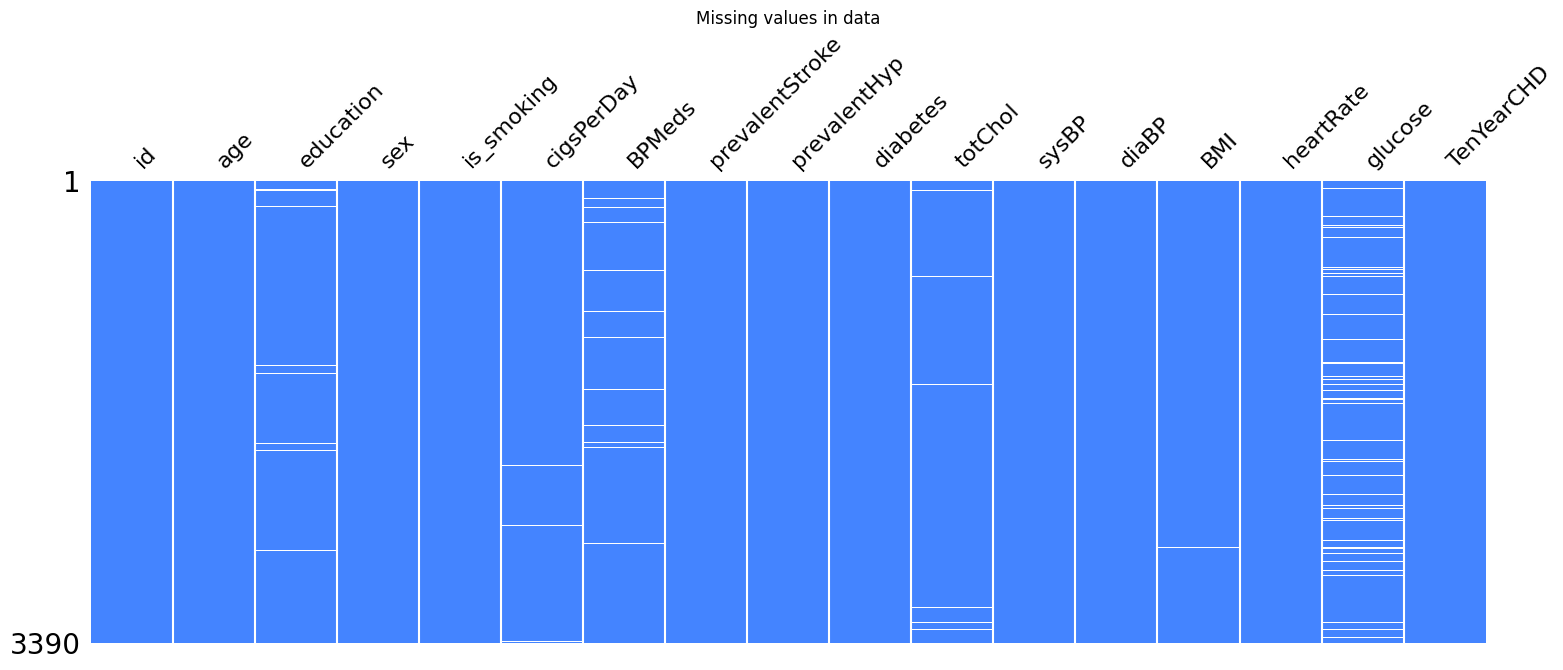

In [8]:
# Visualizing the missing values
import missingno as msno

# Create the missingness matrix
msno.matrix(df, figsize=(18, 6), sparkline=False, color=(0.27, 0.52, 1.0))
plt.title('Missing values in data')
# Display the plot
plt.show()

### What did you know about your dataset?

1)Null values/missing values- 510

2)Dataset has 3390 rows and 17 columns

3)No duplicate Values found in dataset.

4)Columns to convert into numeric(for modelling Purpose)
  
*   sex
*   is_smoking

## ***2. Understanding Your Variables***

In [9]:
#Dataset column
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description

**'id'**: This column represents an identifier or unique identifier for each individual in the dataset.

**'age'**: It represents the age of the individual in years.

**'education'**: This column represents the education level of the individual, which could be encoded categorically (e.g., high school, college, postgraduate) or numerically (e.g., years of education completed).

**'sex'**: It indicates the biological sex of the individual, typically encoded as binary values (e.g., 0 for female, 1 for male).

**'is_smoking'**: This column indicates whether the individual is currently smoking or not, typically encoded as binary values (e.g., 0 for non-smoker, 1 for smoker).

**'cigsPerDay'**: It represents the number of cigarettes smoked per day by the individual.

**'BPMeds'**: This column indicates whether the individual is taking blood pressure medication, typically encoded as binary values (e.g., 0 for not taking medication, 1 for taking medication).

**'prevalentStroke'**: It indicates whether the individual has a history of stroke, typically encoded as binary values (e.g., 0 for no stroke history, 1 for stroke history).

**'prevalentHyp'**: This column indicates whether the individual has prevalent hypertension (high blood pressure), typically encoded as binary values (e.g., 0 for no hypertension, 1 for hypertension).

**'diabetes'**: It indicates whether the individual has diabetes, typically encoded as binary values (e.g., 0 for no diabetes, 1 for diabetes).

**'totChol'**: This column represents the total cholesterol level of the individual in mg/dL (milligrams per deciliter).

**'sysBP'**: It represents the systolic blood pressure of the individual in mmHg (millimeters of mercury).

**'diaBP'**: This column represents the diastolic blood pressure of the individual in mmHg.

**'BMI'**: It indicates the body mass index of the individual, which is a measure of body fat based on height and weight.

**'heartRate'**: This column represents the resting heart rate of the individual in beats per minute.

**'glucose'**: It represents the blood glucose (sugar) level of the individual in mg/dL.

**'TenYearCHD'**: This column indicates the presence or absence of the ten-year risk of developing coronary heart disease (CHD) for the individual, typically encoded as binary values (e.g., 0 for no risk, 1 for risk).

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### 1. Handling Missing Values

In [12]:
# Handling Missing Values
#checking Null values
df.isna().sum().sort_values(ascending= False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

In [13]:
# Checking missing value percentage columnwise.
def show_missing():
  missing = df.columns[ df.isnull().any()].tolist()
  return missing

print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


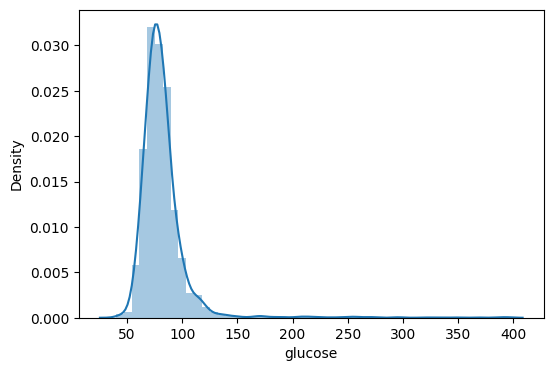

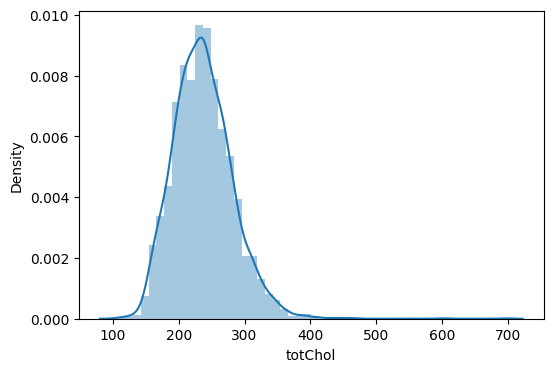

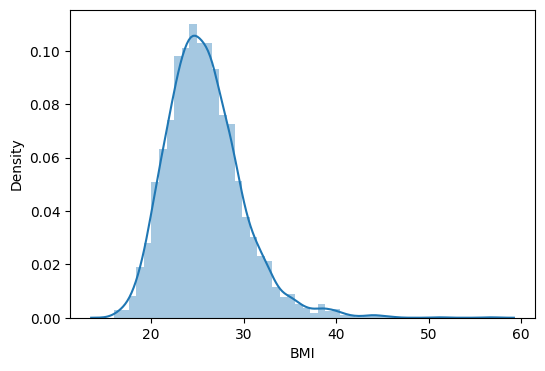

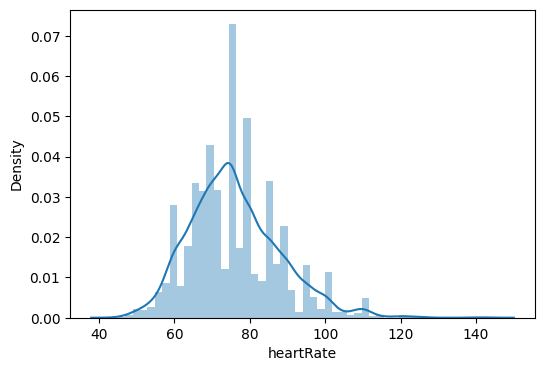

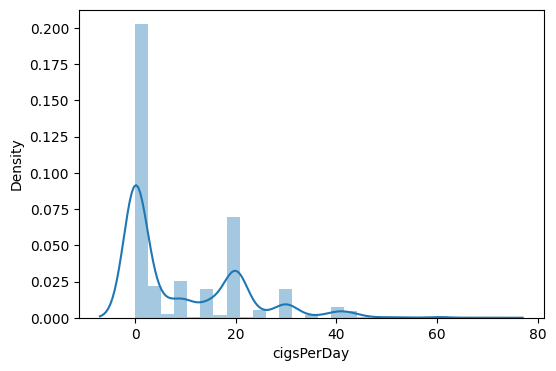

In [14]:
# Visualizing data distribution of the numerical columns which have missing values.

for i in ['glucose','totChol','BMI','heartRate','cigsPerDay']:
  plt.figure(figsize=(6,4))
  sns.distplot(df[i])

In [15]:
# Data is skewed so imputing numerical missing values with median.

df['glucose']= df['glucose'].fillna(df['glucose'].median())

df['totChol']= df['totChol'].fillna(df['totChol'].median())

df['BMI']= df['BMI'].fillna(df['BMI'].median())

df['heartRate']= df['heartRate'].fillna(df['heartRate'].median())

df['cigsPerDay']= df['cigsPerDay'].fillna(df['cigsPerDay'].median())

In [16]:
# Imputing categorical missing data with mode.

df['education']= df['education'].fillna(df['education'].mode()[0])

df['BPMeds']= df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [17]:
# Checking null values again.

df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

As most of the numerical missing value column data is skewed, so I imputed the missing values with median, and for categorical columns I used mode for imputing missing values.

##*2. Dividing numerical and categorical data*

In [18]:
df.describe().columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [19]:
# Dropping 'id' column as it doesn't serve any purpose in dataset.

df = df.drop(columns = 'id')

In [20]:
# finding categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables'.format(len(categorical)))

There are 2 categorical variables


In [21]:
# finding Numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables'.format(len(numerical)))

There are 14 numerical variables


In [22]:
# Assigning a variable for discreet features and assigning the features to it which has less than 20 classes.

discreet = []

for var in df.columns:
  if var not in ['TenYearCHD']:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discreet.append(var)

print('There are {} discreet variables'.format(len(discreet)))

education  values:  [2. 4. 1. 3.]
sex  values:  ['F' 'M']
is_smoking  values:  ['YES' 'NO']
BPMeds  values:  [0. 1.]
prevalentStroke  values:  [0 1]
prevalentHyp  values:  [0 1]
diabetes  values:  [0 1]
There are 7 discreet variables


In [23]:
# Assigning the variable for continuous features.

continuous = [var for var in df.columns if var not in discreet and var not in ['TenYearCHD']]
continuous

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

### What all manipulations have you done and insights you found?

1.   From the above analysis I found that the data has some features with missing value, so I imputed the missing values with median and mode features.

2.   Segregated the data into discreet and continuous for better understanding and analysis of independent variables.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
# Visualizing the dependent variable distribution.

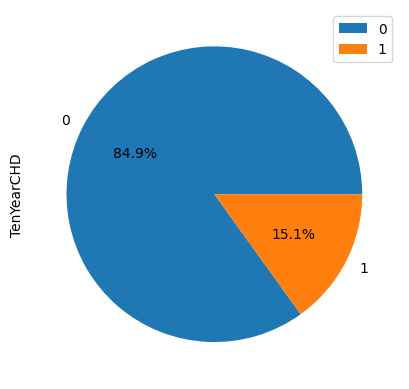

In [24]:
# Chart - 1 visualization of the pie graph.

df['TenYearCHD'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

-Used pie graph as I had to show the proportions of the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

-Here we can see that there is imbalanced distribution of data as 'TenYearCHD' variable has 85% of 0 and 15% of 1 values.

##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Found data imbalance in the data which can affect the efficiency of the models.
Need to use some sampling technique to treat the imbalance.

#### Chart - 2

# Education and Risk of disease.

# Chart - 2 visualization of the bar graph for percentage wise distribution.



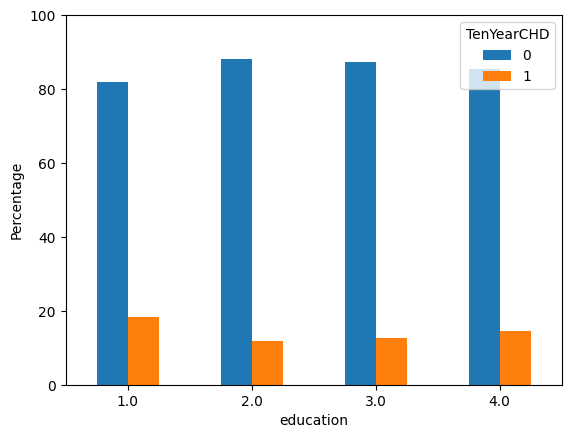

In [25]:
# Chart - 2 visualization of the bar graph for percentage wise distribution.

freq_df = df.groupby('TenYearCHD')['education'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart as I needed to show the comparison of education level and risk of disease in this graph.

##### 2. What is/are the insight(s) found from the chart?

people with education of 1 year has the highest number of percentage who has risk of CHD. others aren't much behind.

##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

People with 1 year of education tend to get the CHD more often than others. Surprisingly people with 4 years of education are on the second rank.

#### Chart - 3
#Gender

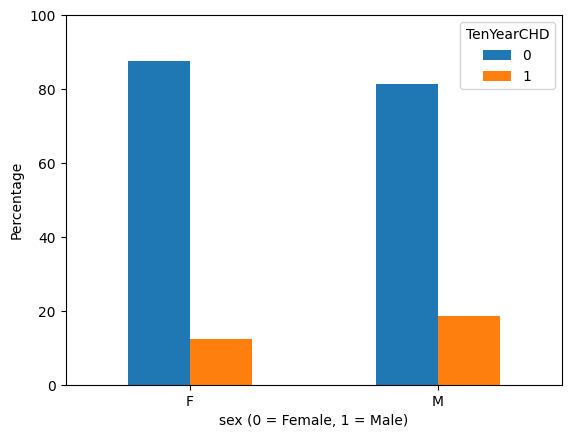

In [26]:
# Chart - 3 visualization of the bar graph for percentage wise distribution.

freq_df = df.groupby('TenYearCHD')['sex'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xlabel('sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart as I needed to show the comparison of percentage of CHD risk with respect to sex.

##### 2. What is/are the insight(s) found from the chart?

Males have higher percentage of people who has the risk of CHD in the next ten years.

##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
If the insight reveals that males are at a higher risk of CHD, it can lead to positive business opportunities in the healthcare industry.

Negative Business Impact:
If the insight indicates a higher risk of CHD in males, it may have negative implications on certain sectors or businesses. For example:

- Higher healthcare costs associated with treating CHD-related conditions in males.

#### Chart - 4
# Smoking

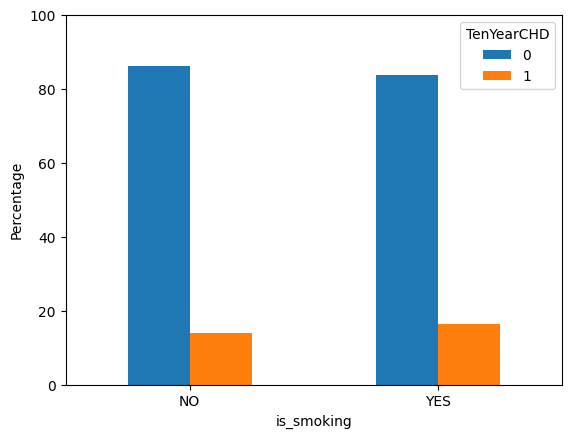

In [27]:
# Chart - 4 visualization of the bar graph for percentage wise distribution.

freq_df = df.groupby('TenYearCHD')['is_smoking'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart as I needed to show the comparison of percentage of CHD risk with respect to smoking.

##### 2. What is/are the insight(s) found from the chart?

People who smoke is at high risk of getting CHD than non smokers, but the difference is not significant.

##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
If the insight highlights the increased risk of CHD in smokers, it can create positive business opportunities in the healthcare industry and related sectors. Potential impacts could include:

- Increased demand for smoking cessation programs, products, and services aimed at helping individuals quit smoking and reduce their risk of CHD.

#### Chart - 5
# Blood pressure medicines.

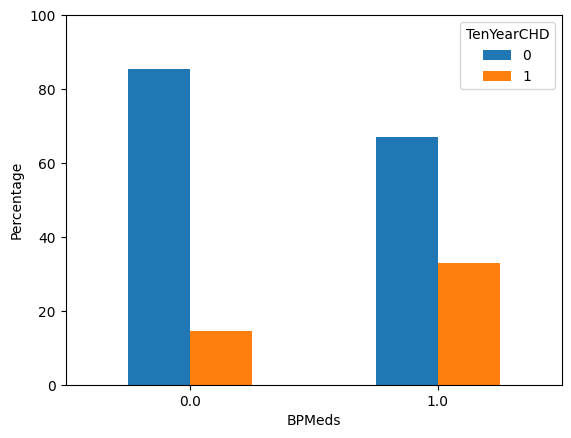

In [28]:
# visualization of the bar graph for percentage wise distribution.

freq_df = df.groupby('TenYearCHD')['BPMeds'].value_counts().unstack(0)

pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart as I needed to show the comparison of percentage of CHD risk with respect to BP medications.

##### 2. What is/are the insight(s) found from the chart?

From the above insights we can see that people who has Blood pressure problems and are already taking medicines for it are prone to CHD.

##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

If the insight highlights the increased susceptibility of individuals with blood pressure issues who are already on medication, it can lead to positive business opportunities in the healthcare industry and related sectors. Potential impacts could include:

- Increased demand for advanced diagnostic tools, treatments, and medications for managing blood pressure and reducing the risk of CHD in this specific population segment.

Negative Business Impact:

If the insight indicates that individuals with blood pressure problems who are already on medication are more prone to CHD, it may have negative implications for certain businesses or sectors. For example:

- Potential challenges for businesses offering blood pressure medications if the effectiveness in reducing the risk of CHD is not significant enough to motivate individuals to continue using the medications.

#### Chart - 6
# Prevalent Stroke.

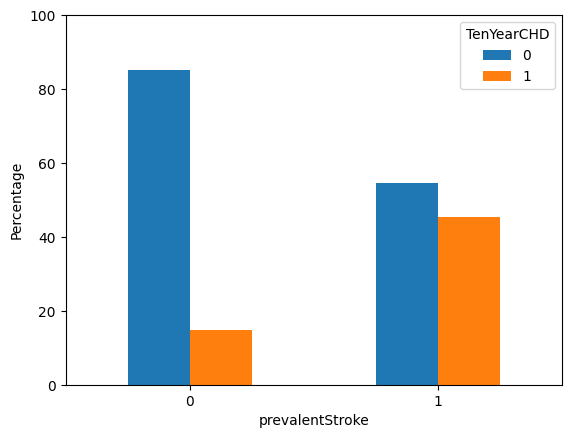

In [29]:
# Chart - 6  visualization of the bar graph for percentage wise distribution.
freq_df = df.groupby('TenYearCHD')['prevalentStroke'].value_counts().unstack(0)

pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart as I needed to show the comparison of percentage of CHD risk with respect to Prevalent Stroke.

##### 2. What is/are the insight(s) found from the chart?

Higher percentage of patients with prevalent stroke symptoms have a 10-year risk of CHD.

##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

We can definitely use this information as an awareness to people with prevalent strokes so that they can take precautionary measures.

#### Chart - 7
# Diabetes

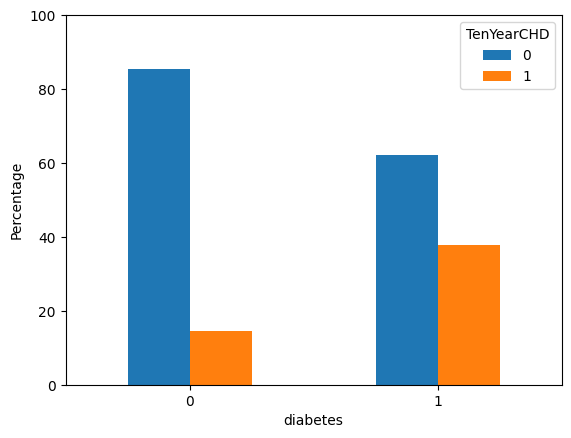

In [30]:
freq_df = df.groupby('TenYearCHD')['diabetes'].value_counts().unstack(0)

pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart as I needed to show the comparison of percentage of CHD risk with respect to diabetes.

##### 2. What is/are the insight(s) found from the chart?

Diabetic patients tend to have a higher 10-year risk of CHD

##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

We can definitely use this information as an awareness to people with diabetes so that they can take precautionary measures.

#### Chart - 8
#Prevalent Hypertension

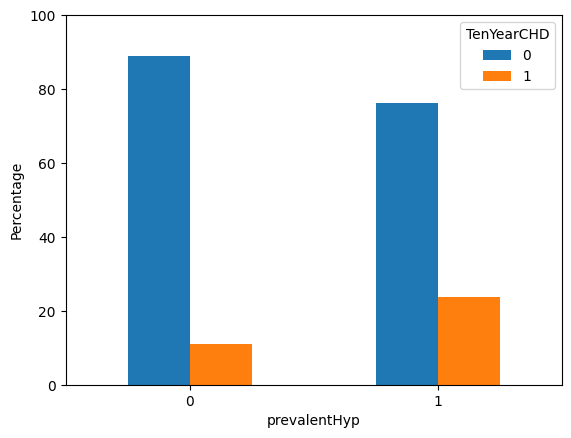

In [31]:
# Chart - 8 visualization of the bar graph for percentage wise distribution.
freq_df = df.groupby('TenYearCHD')['prevalentHyp'].value_counts().unstack(0)

pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart as I needed to show the comparison of percentage of CHD risk with respect to prevalent hypertension.

##### 2. What is/are the insight(s) found from the chart?

Hypertensive patients are at higher risk of CHD

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can definitely use this information as an awareness to people with diabetes so that they can take precautionary measures.

#### Chart - 9
#Continuous data distributions.

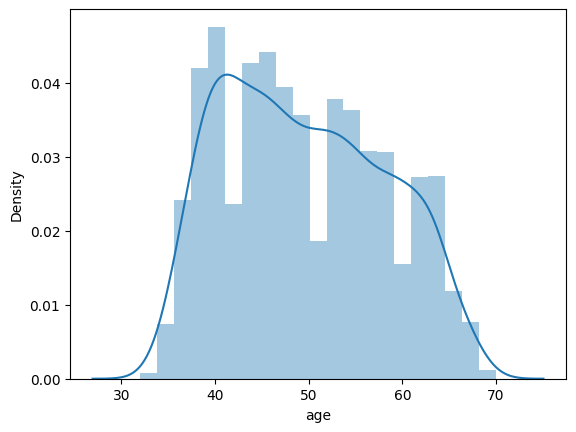

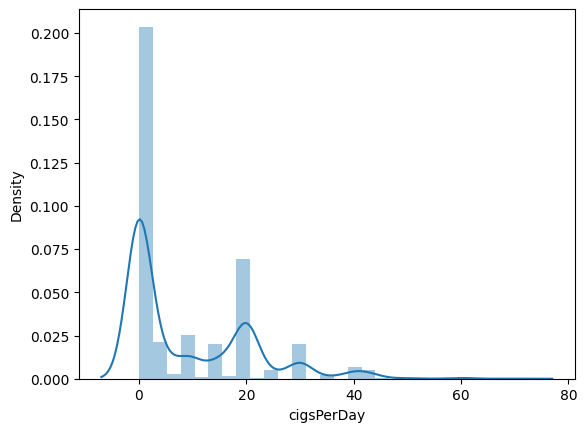

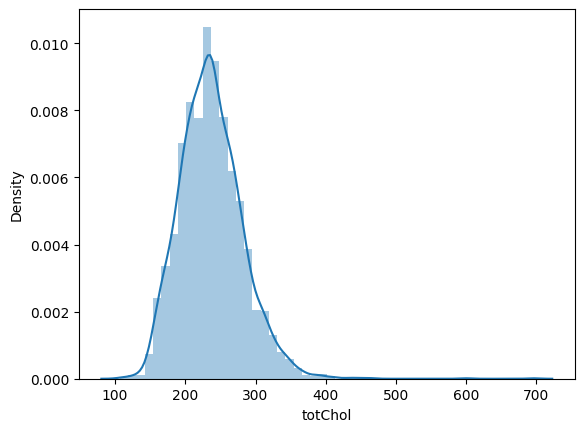

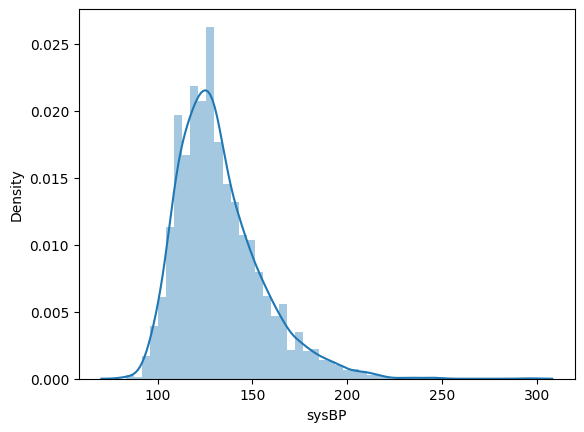

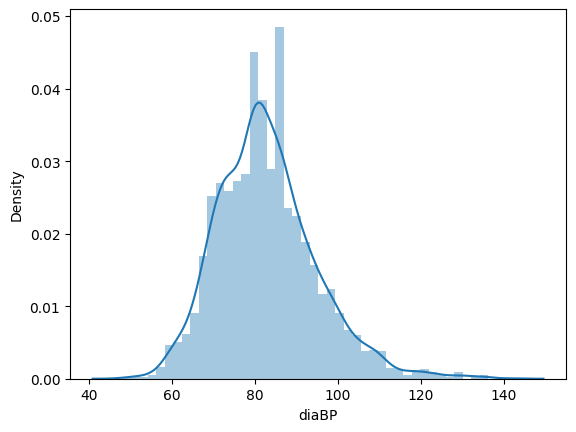

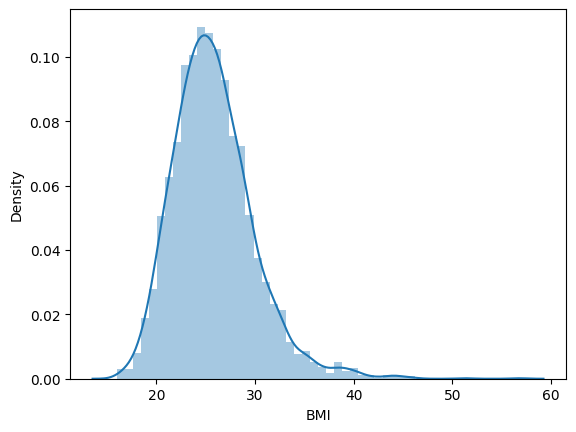

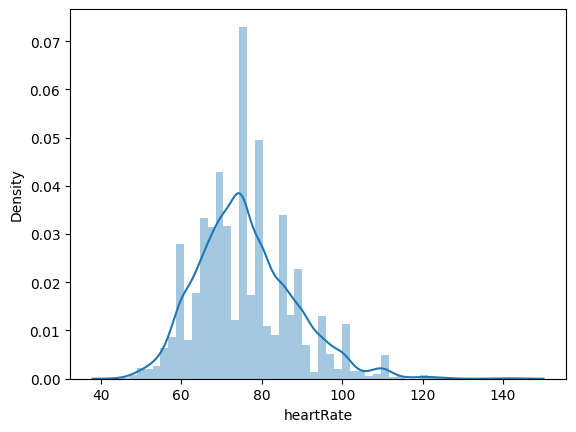

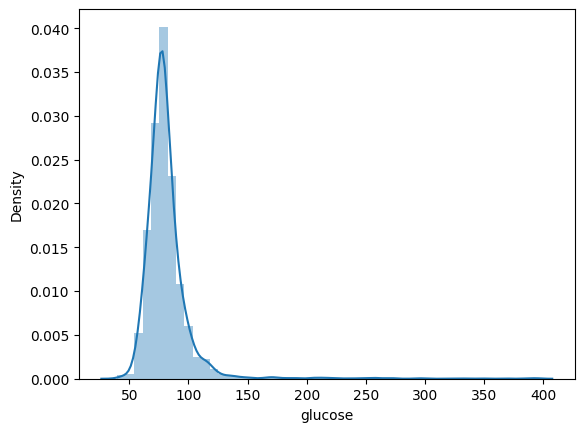

In [32]:
#Chart - 9 visualization distplots for the distribution of continuous data.

for i in continuous:
  if i not in ['TenYearCHD']:
    plt.figure()
    sns.distplot(df[i])

##### 1. Why did you pick the specific chart?

> Indented block

Used distplot to show data distribution.

##### 2. What is/are the insight(s) found from the chart?

Most of the data is skewed need to transform data.




#### Chart - 10
# BMI and Gender

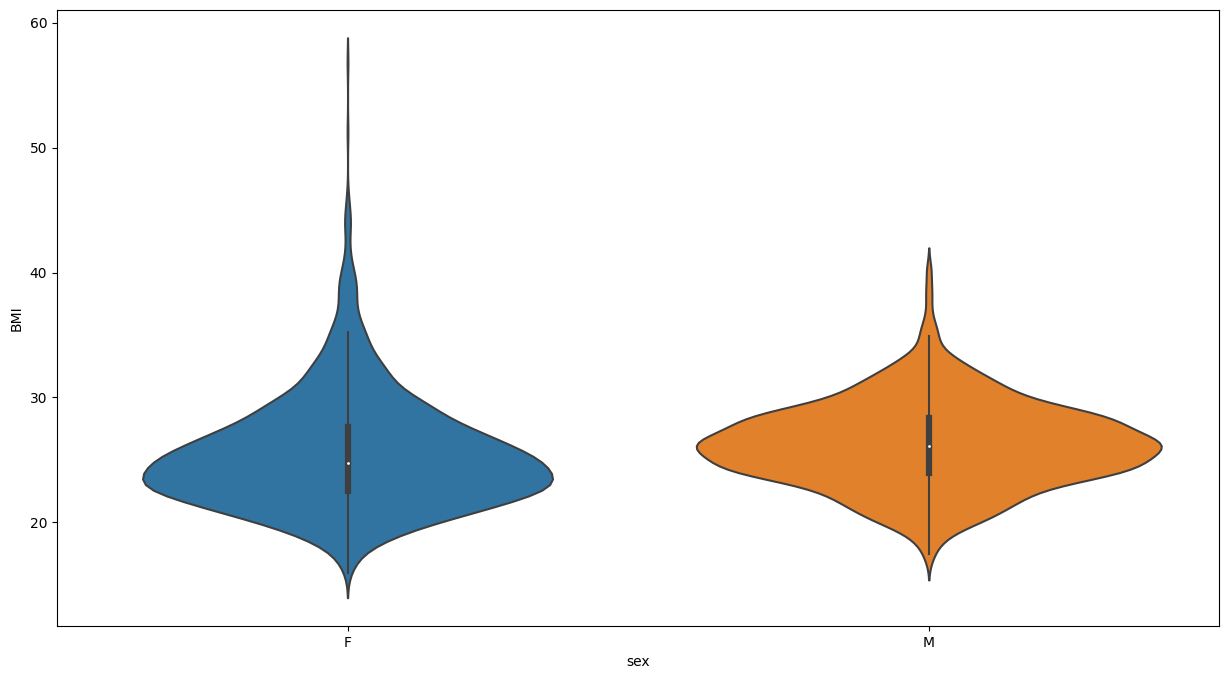

In [33]:
# Chart - 10 visualization code for plotting violin plots
plt.figure(figsize = (15,8))
sns.violinplot(x = 'sex', y = 'BMI', data = df)
plt.show()

##### 1. Why did you pick the specific chart?

Violin plots display the shape, spread, and density of the data distribution. They provide information about the location of the median, quartiles, and outliers, similar to a box plot. Additionally, the width of the violin at different points indicates the density of the data at those values.

##### 2. What is/are the insight(s) found from the chart?

Healthy BMI is considered as a score between 20 - 25. most of the Males lie slightly above 25, and most of the females lie below 25. But the whisker of violin plot in female goes upto 55-60.

##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 11

#Smoking and Gender

<Figure size 2500x800 with 0 Axes>

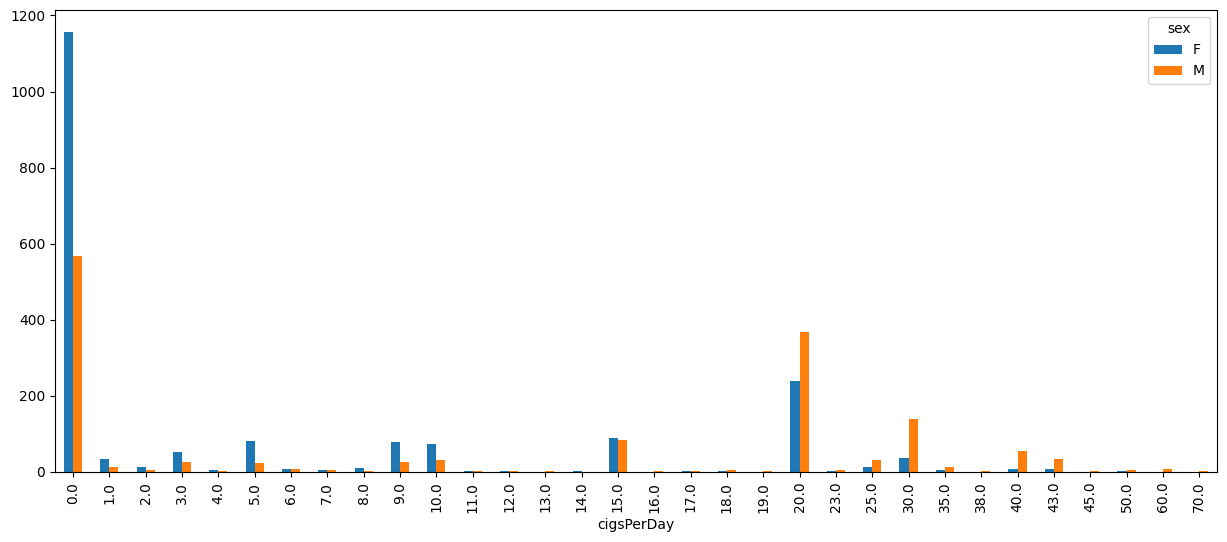

In [34]:
# Chart - 11 visualization code for bar chart.
plt.figure(figsize = (25,8))
df.groupby('sex')['cigsPerDay'].value_counts().unstack(0).plot.bar(figsize = (15,6))
plt.show()

##### 1. Why did you pick the specific chart?`

Used bar chart as I needed to show the comparison of no. of cigarettes per day with respect to gender.

##### 2. What is/are the insight(s) found from the chart?

Majority non-smokers are females, but in some instances like 5,8,9,10 and 15 cigarettes a day females are in lead.

#### Chart - 12
# Systolic Blood Pressure and Gender.

<Axes: xlabel='sex', ylabel='sysBP'>

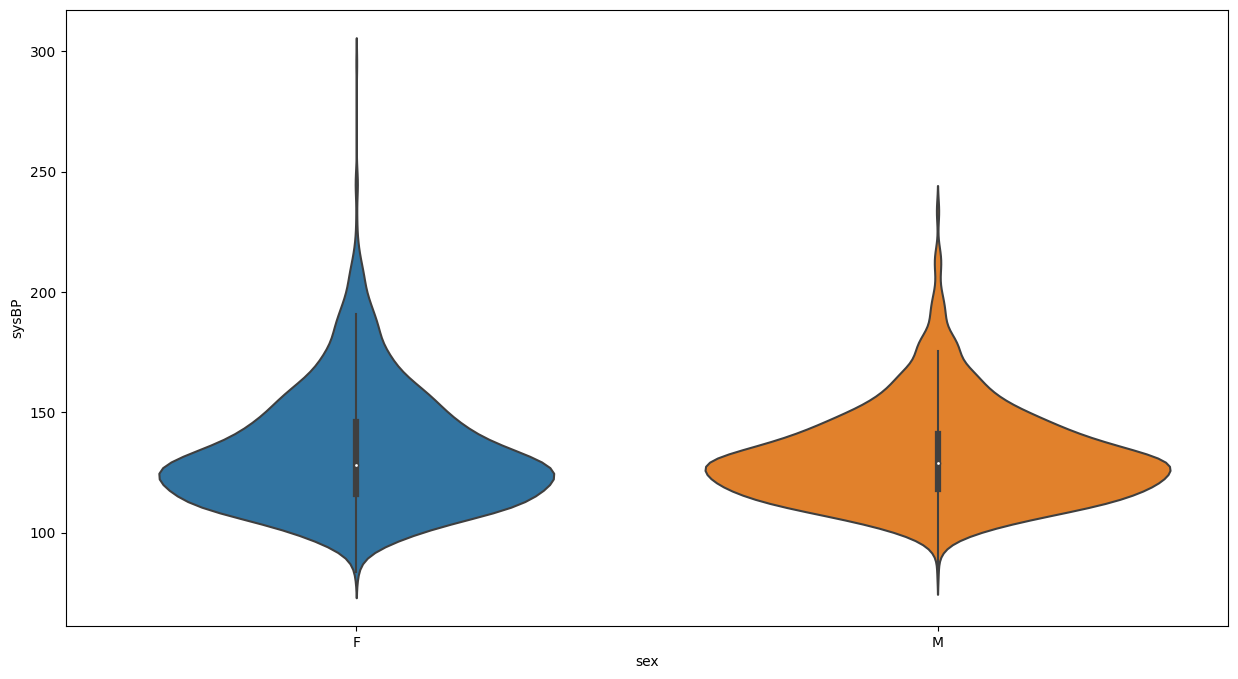

In [35]:
# Chart - 12 visualization code
plt.figure(figsize = (15,8))
sns.violinplot(x = 'sex', y = 'sysBP', data = df)

##### 1. Why did you pick the specific chart?

Violin plots display the shape, spread, and density of the data distribution. They provide information about the location of the median, quartiles, and outliers, similar to a box plot. Additionally, the width of the violin at different points indicates the density of the data at those values.

##### 2. What is/are the insight(s) found from the chart?

Females experience higher BP than men in certain instances.

#### Chart - 13
#Diabetes and Glucose.

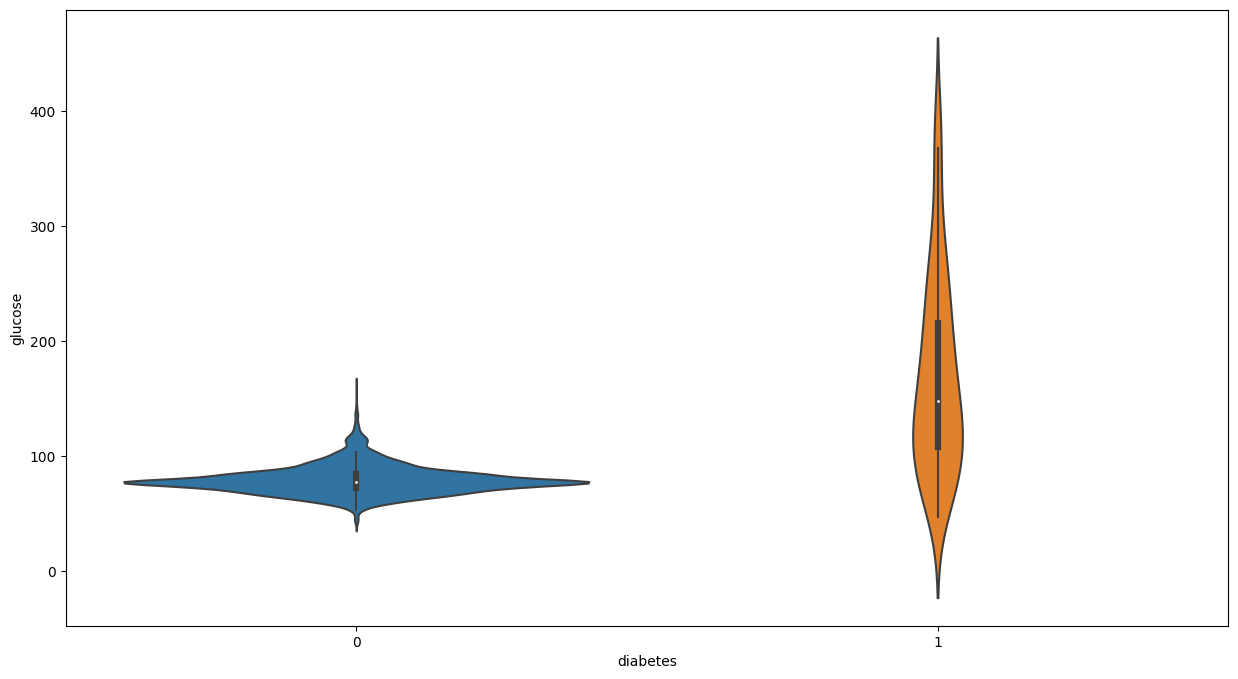

In [36]:
# Chart - 13 visualization code
plt.figure(figsize = (15,8))
sns.violinplot(x = 'diabetes', y = 'glucose', data = df)
plt.show()

#### 1. Why did you pick the specific chart?

*   List item
*   List item

Violin plots display the shape, spread, and density of the data distribution. They provide information about the location of the median, quartiles, and outliers, similar to a box plot. Additionally, the width of the violin at different points indicates the density of the data at those values.

##### 2. What is/are the insight(s) found from the chart?

Average Blood glucose is 70-100 milligrams per deciliter (mg/dL). We can see majority of non-diabetics in this range, on the other hand the diabetics share  negative values to more than 400 milligrams per deciliter (mg/dL).

#### Chart - 14 - Correlation Heatmap

<Axes: >

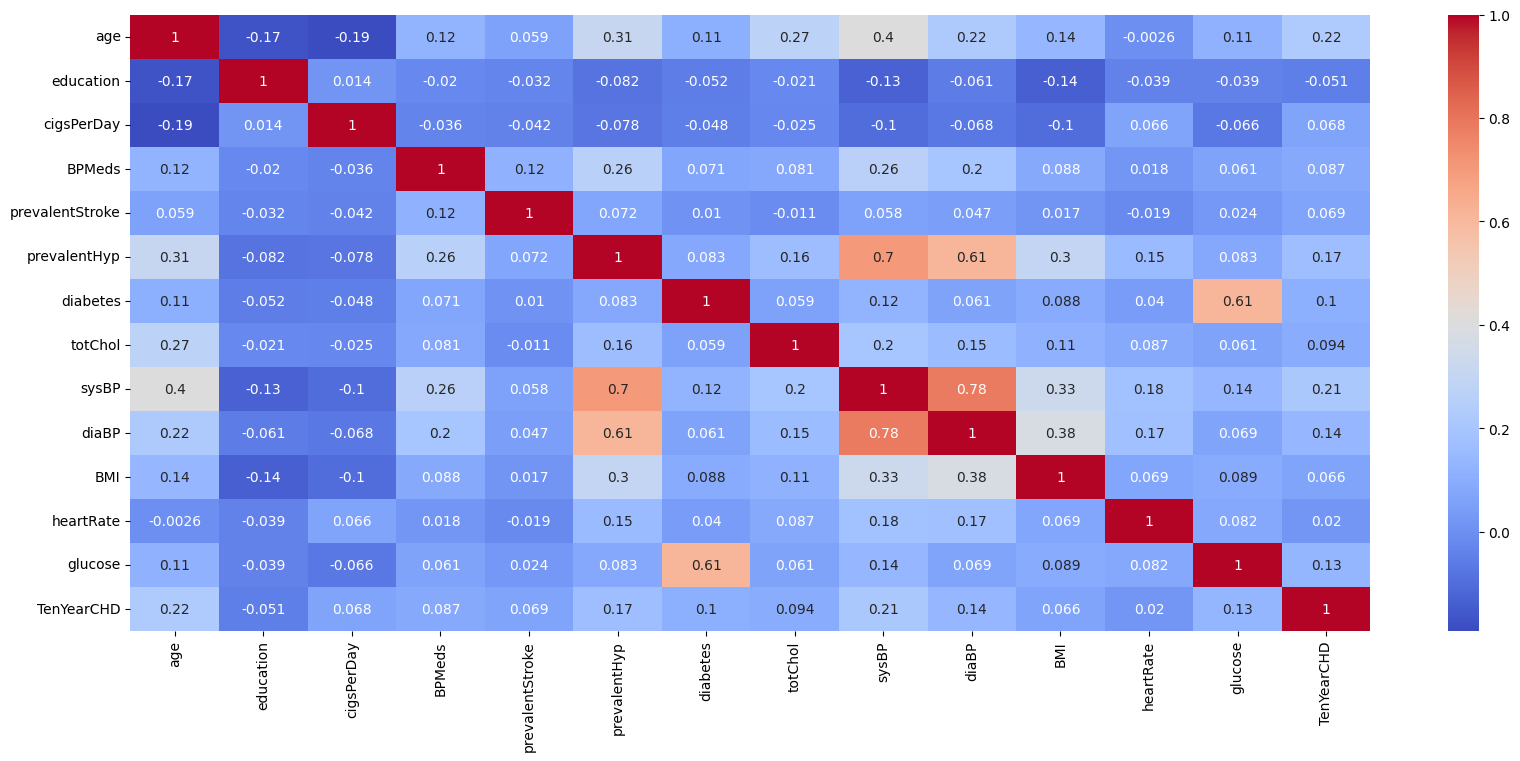

In [37]:
# Correlation Heatmap visualization code

plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

##### 1. Why did you pick the specific chart?

I used correlation heatmap to visualize correlation among features.

##### 2. What is/are the insight(s) found from the chart?

Systolic BP - Diastolic BP, Systolic BP - Prevalent Hypertension and Diastolic BP - Prevalent Hypertension have high correlation.

#### Chart - 15 - Pair Plot

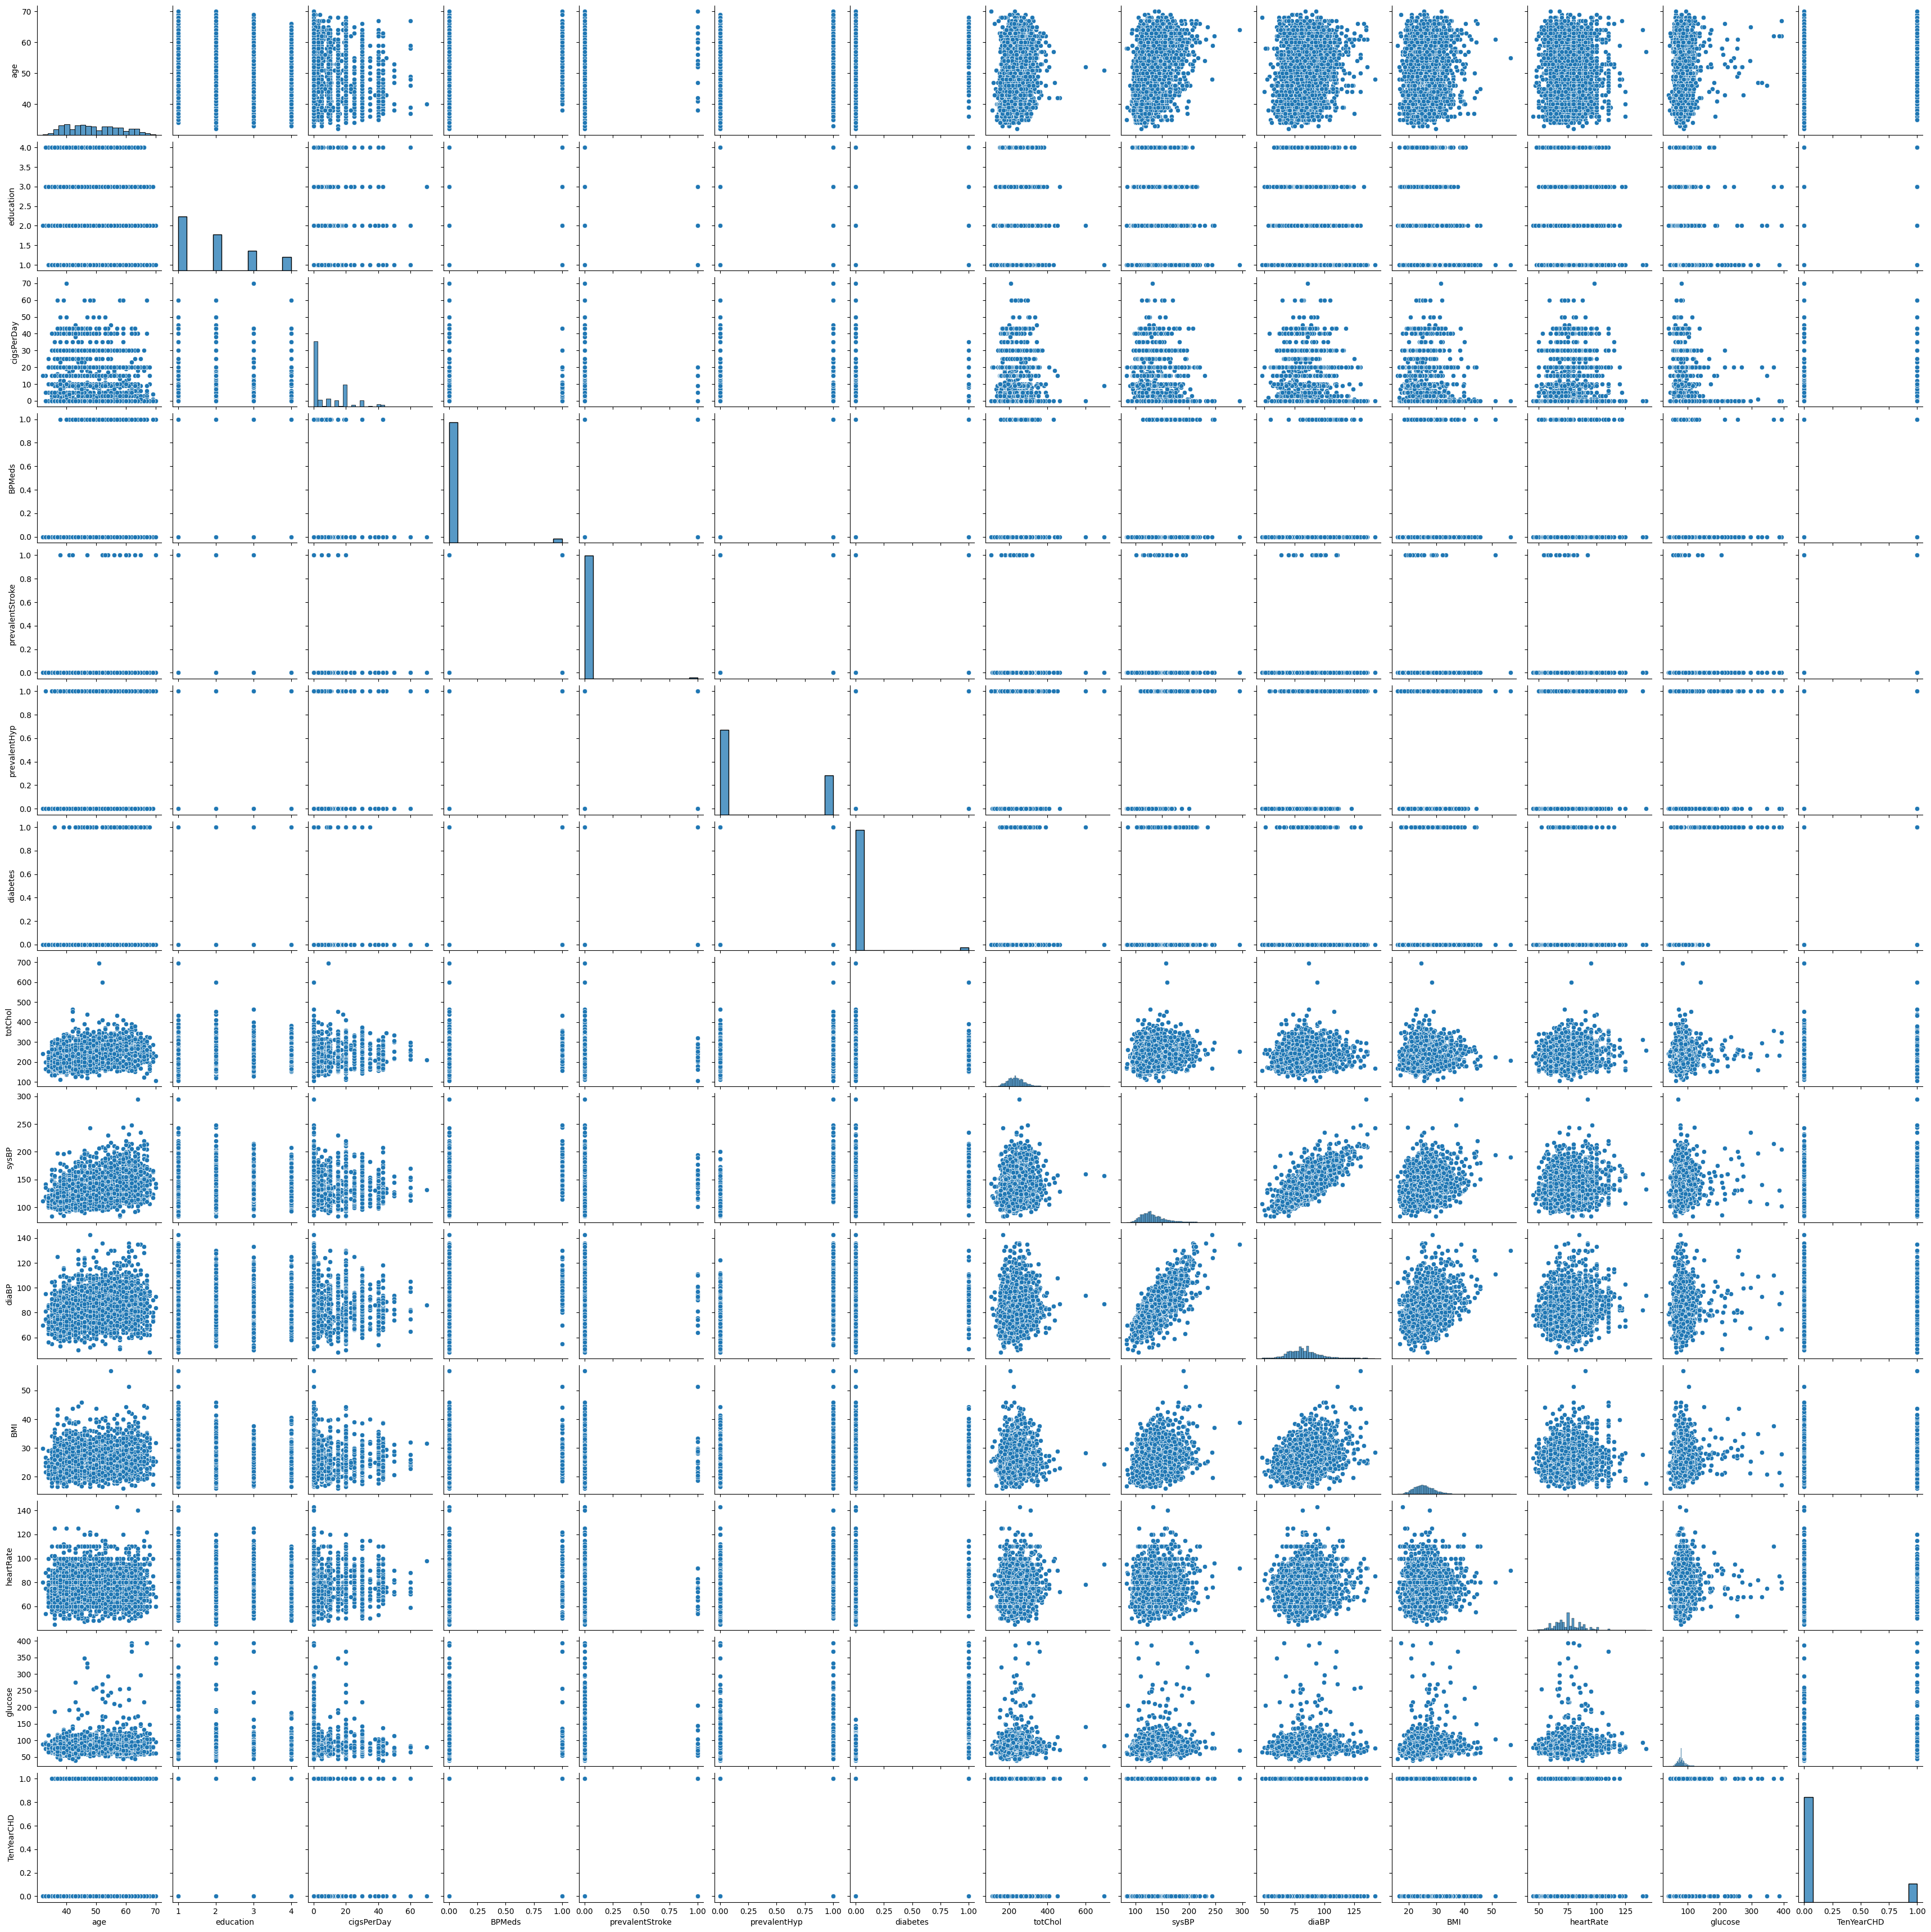

In [38]:
# Pair Plot visualization code

sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Used pairplot for visualizing the relationships between multiple variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Here also we can see Systolic BP - Diastolic BP, Systolic BP - Prevalent Hypertension and Diastolic BP - Prevalent Hypertension have high correlation.

## ***5. Hypothesis Testing***

### Hypothetical Statement

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

null_hypothesis = 'There is no relationship between is_smoking and TenyearCHD'

alt_hypothesis = 'There is a relationship between is_smoking and TenyearCHD'

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm

#define null and alternative hypotheses
null_hypothesis = 'There is no relationship between is_smoking and TenyearCHD'
alt_hypothesis = 'There is a relationship between is_smoking and TenyearCHD'

#performing linear regression
X = sm.add_constant(df['is_smoking'].apply(lambda x:1 if x=='YES' else 0 ))
y = df['TenYearCHD']
model = sm.OLS(y,X).fit()

#printing summary statistics
print(model.summary())

#Extracting p-value for temperture coefficient
p_value = model.pvalues[1]
print('p-value:',p_value)

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.954
Date:                Mon, 07 Aug 2023   Prob (F-statistic):             0.0468
Time:                        11:34:34   Log-Likelihood:                -1324.0
No. Observations:                3390   AIC:                             2652.
Df Residuals:                    3388   BIC:                             2664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1386      0.009     15.988      0.0

##### Which statistical test have you done to obtain P-Value?

We use the OLS(ordinary least square) function from the statsmodels package.

In this case, since the p-value(0.0468)is less than the singificance level of 0.05, we can reject the null hypothesis that ''There is no relationship between is_smoking and TenyearCHD'. Therefore, based on the available data, there is evidence to support the alternative hypothesis that 'There is a relationship between is_smoking and TenyearCHD'.

##### Why did you choose the specific statistical test?

The OLS regression model is commonly used to assess the relationship between a dependent variable and one or more independent variables.

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

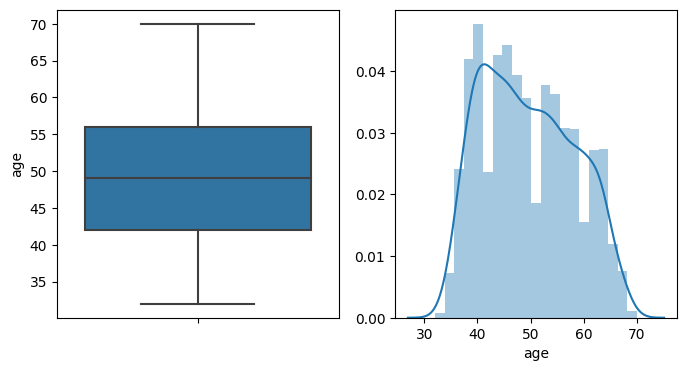

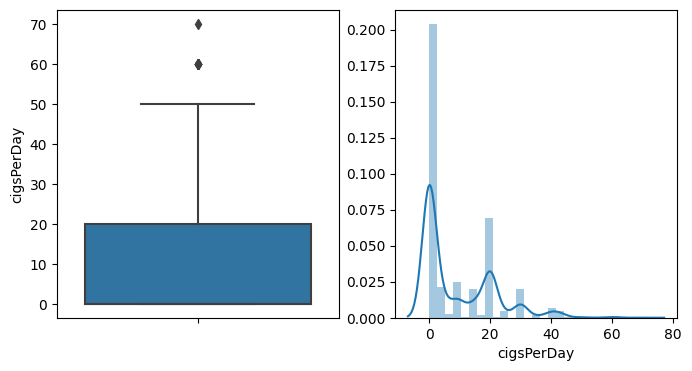

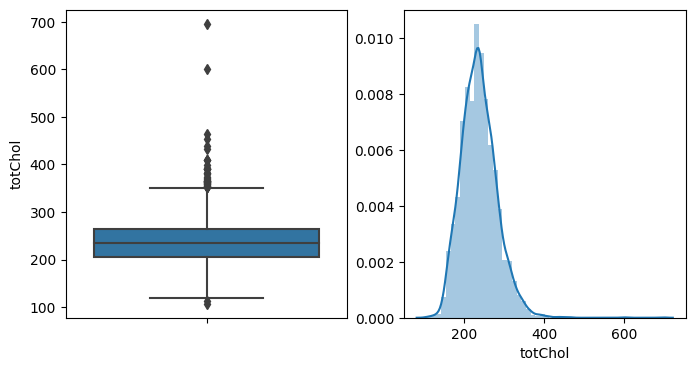

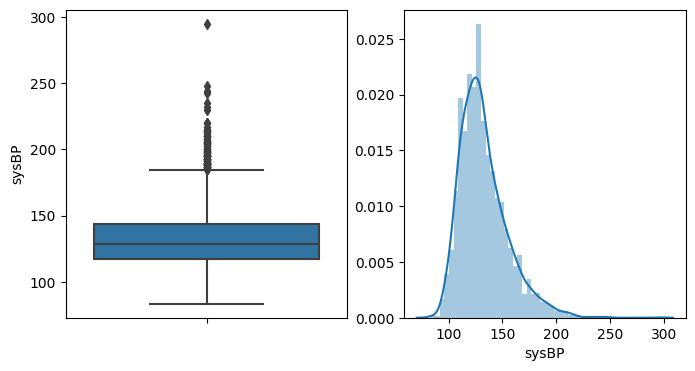

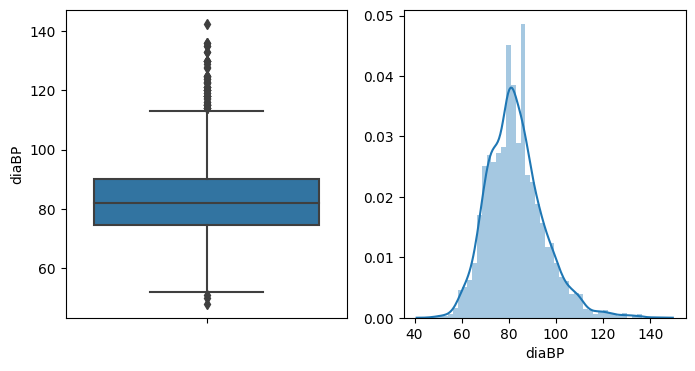

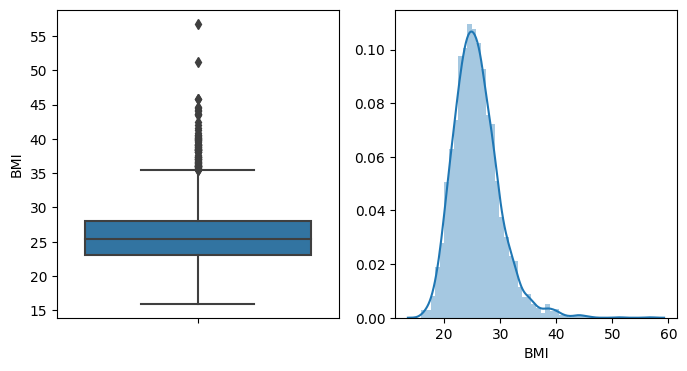

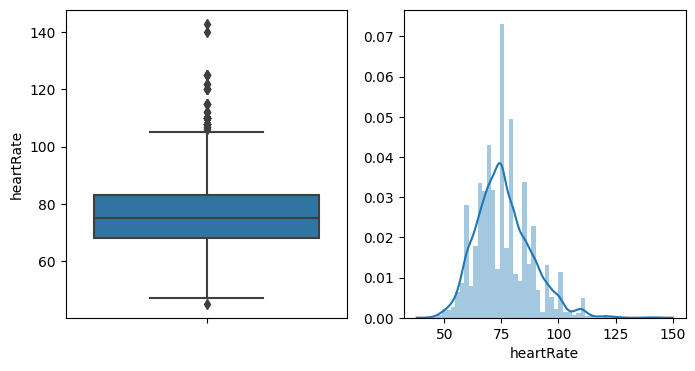

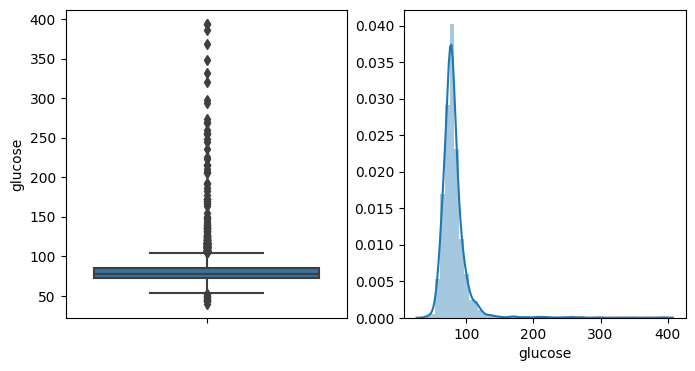

In [40]:
# Checking outliers
for var in continuous:
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

In [41]:
# Handling Outliers & Outlier treatments

# #Capping the outlier rows with Percentiles
for i in continuous:
  upper_lim = df[i].quantile(.95)
  lower_lim = df[i].quantile(.05)
  df.loc[(df[i] > upper_lim),i] = upper_lim
  df.loc[(df[i] < lower_lim),i] = lower_lim

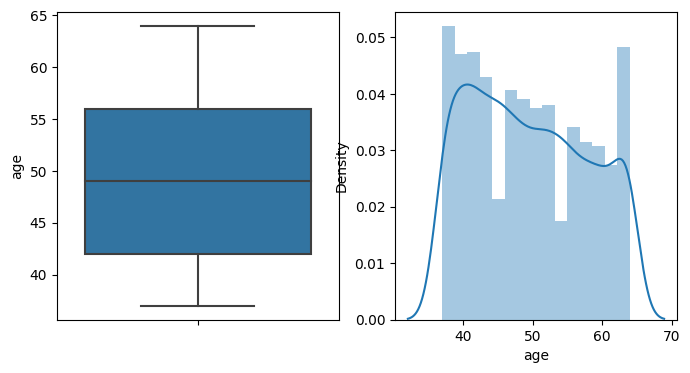

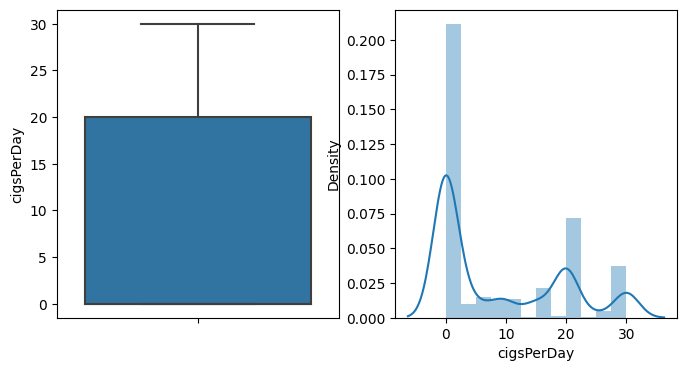

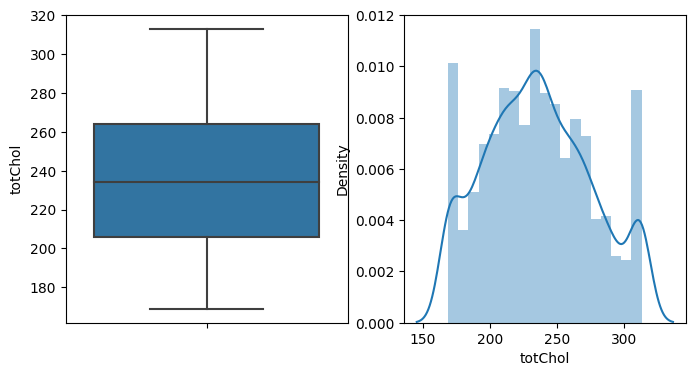

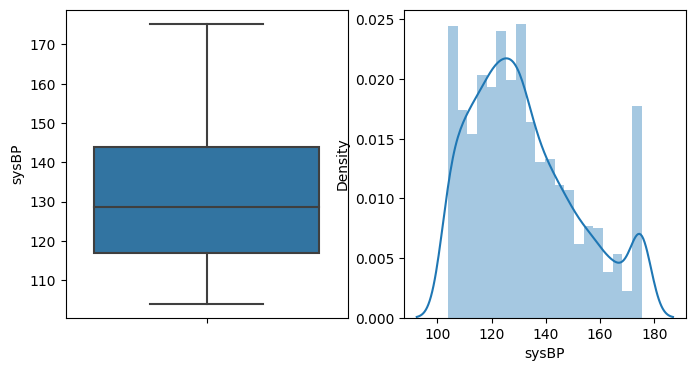

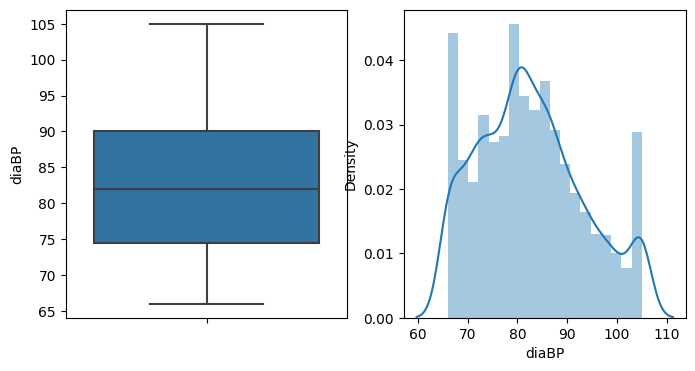

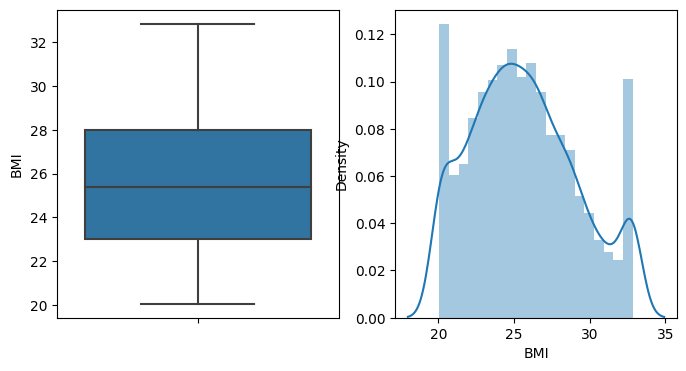

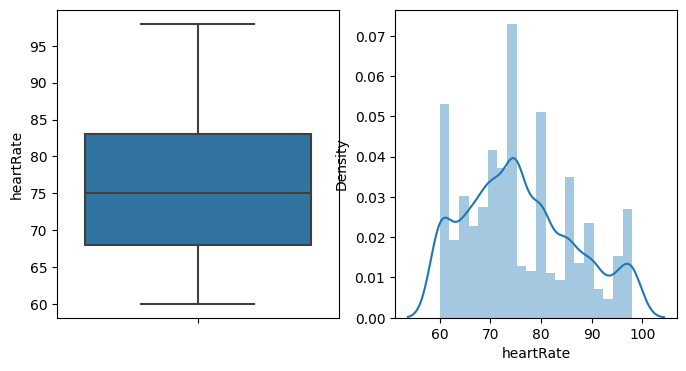

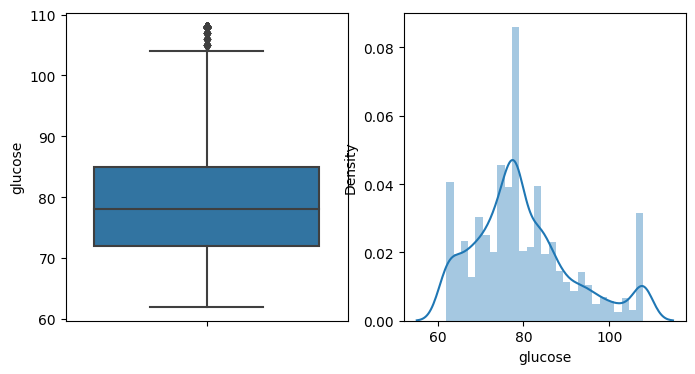

In [42]:
 #Checking outliers
for var in continuous:
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_xlabel(var)

    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used outliear capping with the use of quantiles to treat outliers.

### 3. Categorical Encoding

In [43]:
# Encode your categorical columns

df['sex'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0) # using label encoding for 'sex' column.

df['is_smoking'] = df['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0) # using label encoding for 'is_smoking' column.

#### What all categorical encoding techniques have you used & why did you use those techniques?

Used label encoding for categorizing the class.

### 2. Feature Selection

In [44]:
# Select your features wisely to avoid overfitting
x = df.drop(columns = ['TenYearCHD'], axis = 1)
y = df['TenYearCHD']



In [45]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

In [46]:

independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]
calc_vif(df[independent_variables])

variables         VIF
0             sysBP  177.412662
1             diaBP  167.199912
2               BMI   61.597415
3         heartRate   50.724797
4           glucose   47.147752
5               age   47.101645
6           totChol   40.338650
7        is_smoking    5.838418
8        cigsPerDay    5.184057
9         education    4.657434
10     prevalentHyp    2.571503
11              sex    2.160796
12           BPMeds    1.130782
13         diabetes    1.112065
14  prevalentStroke    1.026454

In [47]:
#Eliminating the feature with high VIF
independent_variables = [i for i in df.columns if i not in ['TenYearCHD','sysBP','diaBP','glucose',
                                                            'BMI','totChol','heartRate','is_smoking']]
calc_vif(df[independent_variables])

variables       VIF
0              age  5.442645
1        education  3.995999
2              sex  1.976329
3       cigsPerDay  1.805761
4     prevalentHyp  1.685179
5           BPMeds  1.120342
6         diabetes  1.044625
7  prevalentStroke  1.024795

In [48]:
#There are total 8 feature which are less than 5 in variance score. we will be droping the rest from it.
x = df.drop(columns = ['TenYearCHD','sysBP','diaBP','glucose','BMI','totChol','heartRate','is_smoking'], axis = 1)
y = df['TenYearCHD']

##### What all feature selection methods have you used  and why?

Used variance inflation factor to find out multicollicollinearity.

##### Which all features you found important and why?

0. age
1. education
2. sex
3. cigsPerDay
4. prevalentHyp
5. BPMeds
6. diabetes
7. prevalentStroke
   
   These are all the feature that we will be using in our models. we have chosen these feature according to VIF scores.



### 5. Data Transformation

In [49]:
# Transform Your data
x = np.log(x+1)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

I think the data needed to be transformed as the data was skewed.

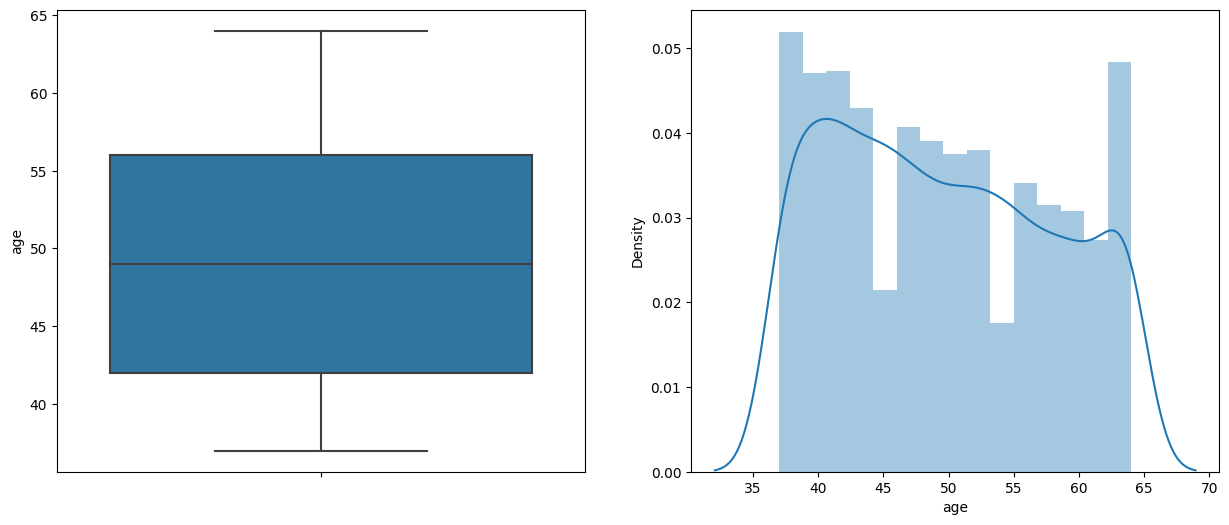

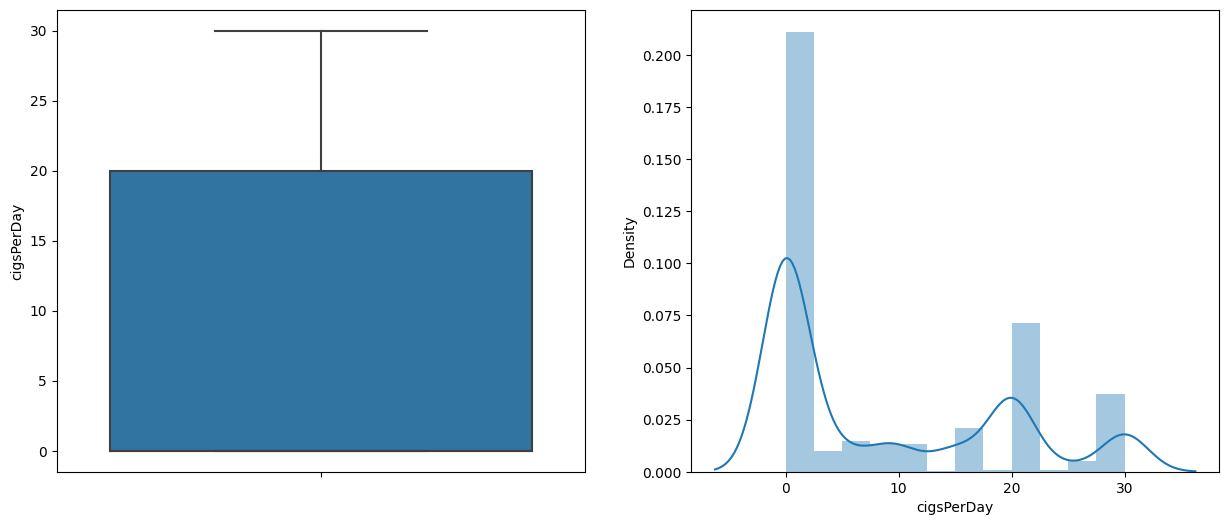

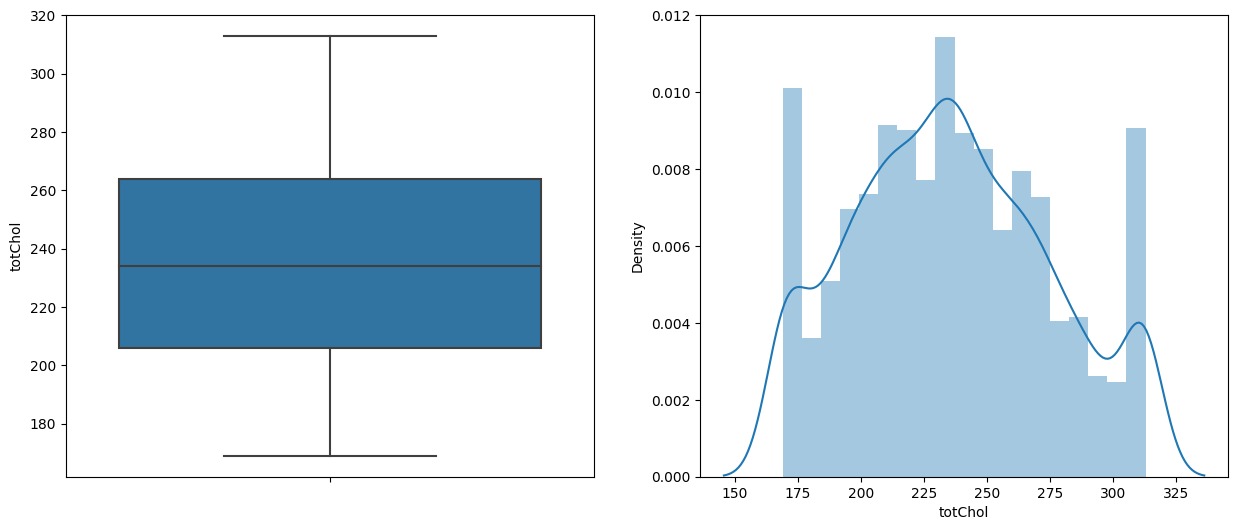

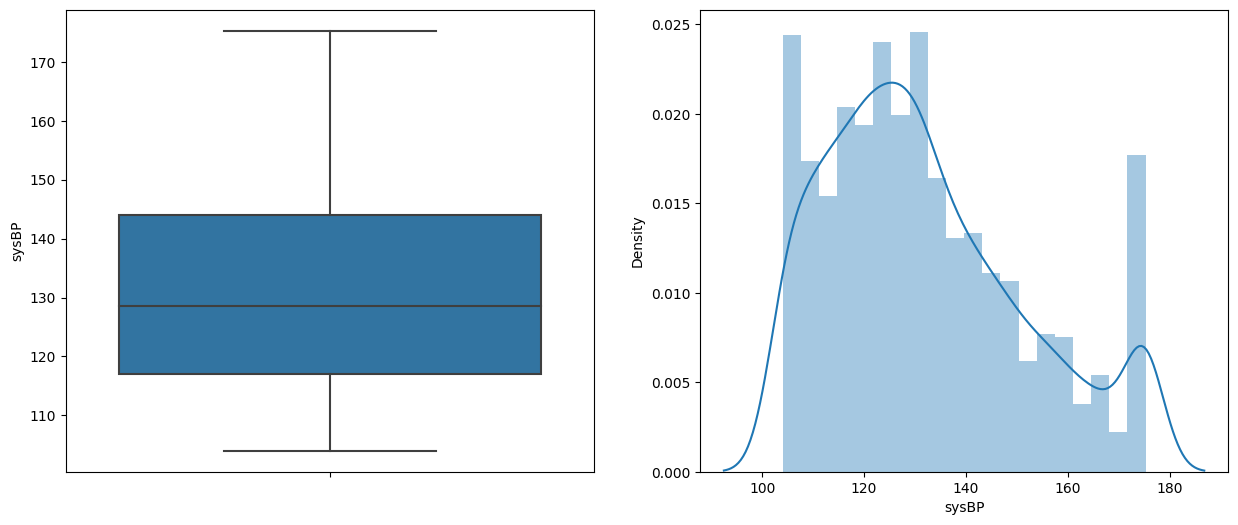

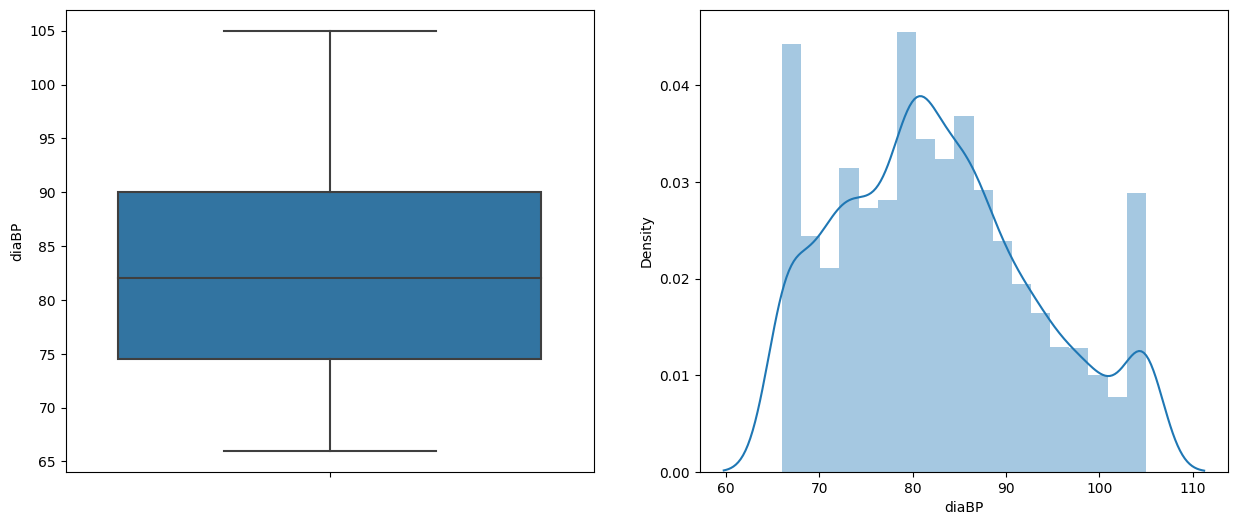

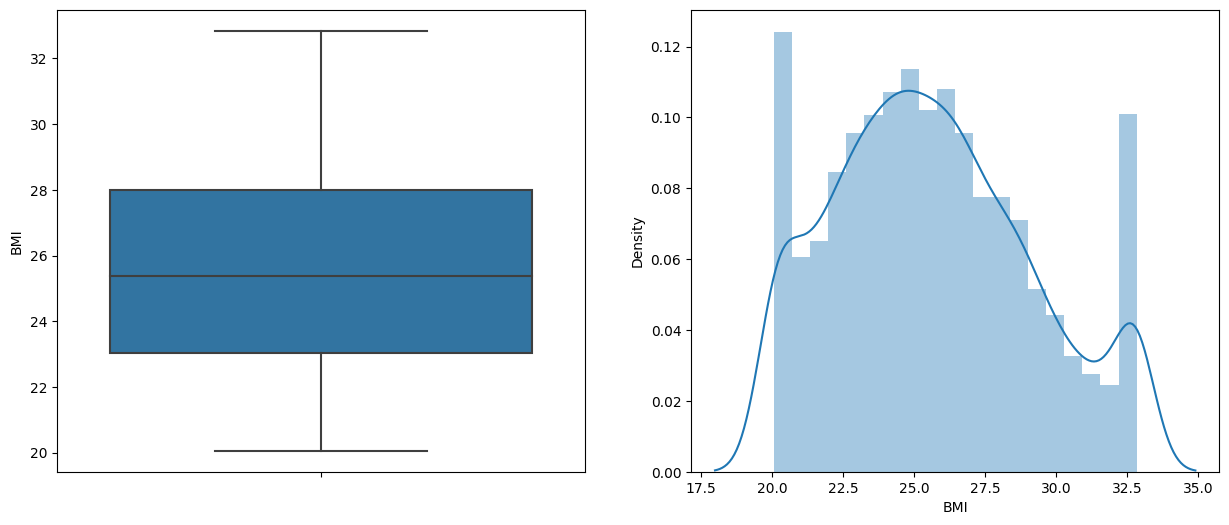

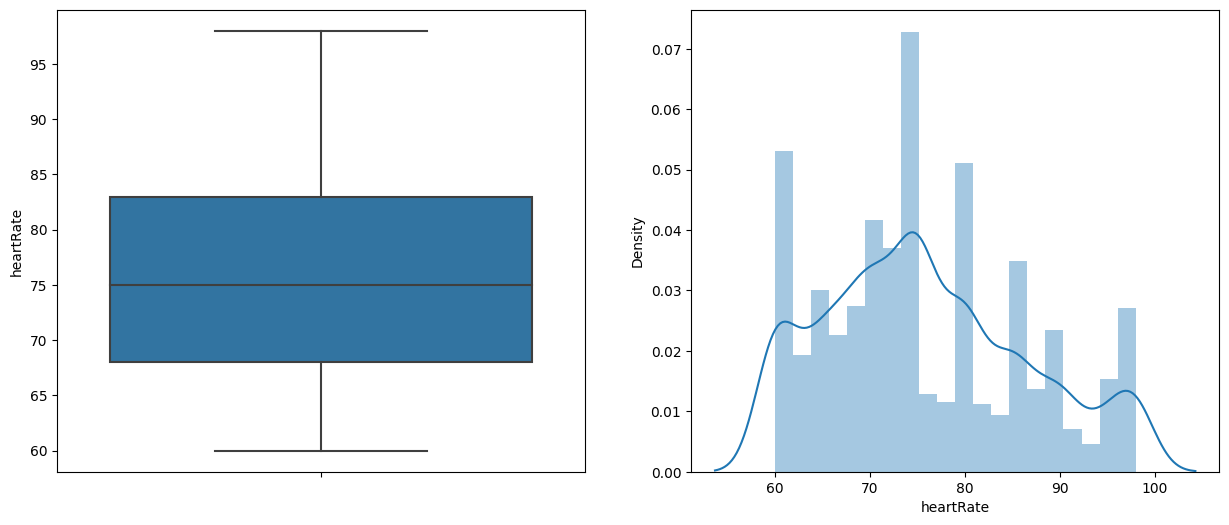

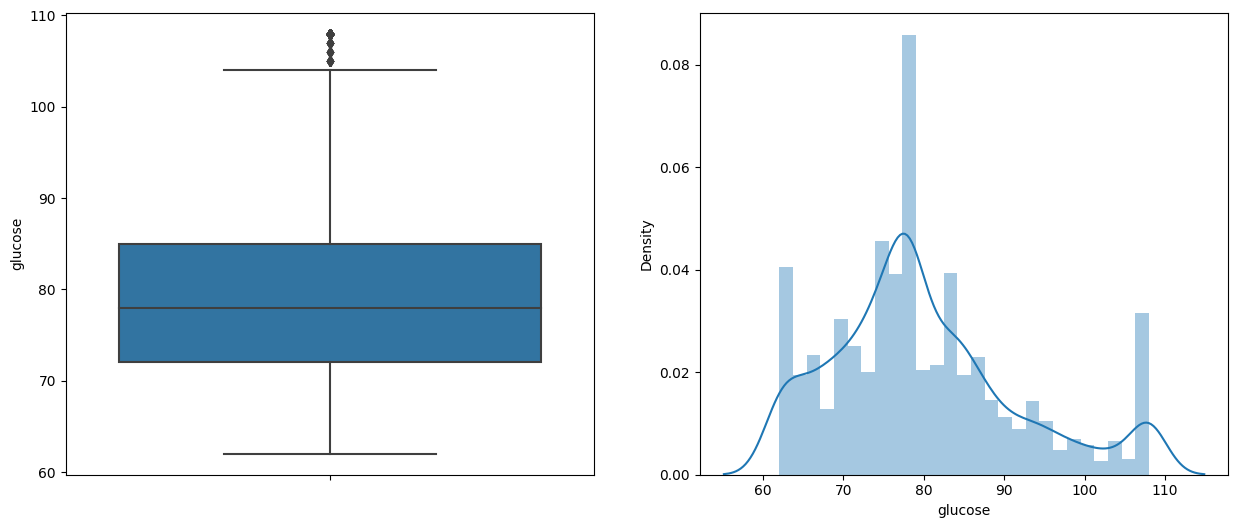

In [50]:
#visualisation of data after log transformation.

#we can see that there is improvement in data distribution after transformation.
for var in continuous:
     plt.figure(figsize=(15,6))
     plt.subplot(1, 2, 1)
     fig = sns.boxplot(y=df[var])
     fig.set_title('')
     fig.set_ylabel(var)

     plt.subplot(1, 2, 2)
     fig = sns.distplot(df[var].dropna())
     fig.set_xlabel(var)

     plt.show()

### 8. Data Splitting


In [51]:
# Split your data to train and test. Choose Splitting ratio wisely.

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.40 , random_state= 42, stratify = y)

# choosing test size as 0.4 and stratify = y as our data is imblance.

### What data splitting ratio have you used and why?

Using 40% data as test data as it is imbalanced and in my opinion the models needs more data to train.



### 6. Data Scaling

In [52]:
#scaling the data using Normalization method.

# Scaling your data
mms = MinMaxScaler()  #Using MinMaxScaler as scaler

x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

##### Which method have you used to scale you data and why?

This methid was chosen to ensure that the feature values are normalized to specific range.

MinMaxScaler scales the feature by trasforming them to range between 0 and 1.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [53]:
# Checking data imbalance
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

As we can see the data is imblanced in nature so we have to use some sampling technique to trat imbalance in data.

In [54]:

# Handling Imbalanced Dataset using SMOTE

from imblearn.combine import SMOTETomek


# Create an instance of SMOTE
smote = SMOTETomek(random_state=42)

# Apply SMOTE to generate synthetic samples
x_train, y_train = SMOTETomek(random_state=42).fit_resample(x_train, y_train)

In [55]:
print(x_train.shape[0])
print(y_train.shape[0])

3302
3302


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used Oversampling using SMOTE(Synthetic Minority Over-sampling Technique) to address class imblance in datasets.

## ***7. ML Model Implementation***

In [56]:
# Defining a function to train the input model and print evaluation matrix

score_df = pd.DataFrame()

scoring = make_scorer(f1_score, pos_label=1)

features = [i for i in df.columns if i not in ['TenYearCHD']]

def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = features
    except:
      importance = np.abs(model.coef_[0])
      feature = independent_variables
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
    plt.title(f'{label} Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')

    global score_df
    score_df[model] = {'precision' : precision_score(act,pred),'recall' : recall_score(act,pred), 'f1_score' : f1_score(act,pred), 'accuracy': accuracy_score(act,pred)}

    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model

### ML Model - 1

# Logistic Regression

In [57]:
# Fitting Logestic Regression Model

lrm = LogisticRegression(fit_intercept=True)

#Cross- Validation & Hyperparameter Tuning

grid = {
    'penalty':['l1','l2'],                    #Regularization penalty(L1 orL2)
    'C':[0.1,1.0,10.0],                       # Inverse of regularization strength
    'solver':['liblinear','saga'],            # solver algorithm
    'max_iter':[100,200,300,10000]            #Maximum number of iteration
}

# GridSearch to find the best parameters
lr = GridSearchCV(lrm, param_grid=grid, cv = 5)
lr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'max_iter': [100, 200, 300, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

### 1. Explain the ML Model used and it's perfoemance using Evaluation metric Score Chart.

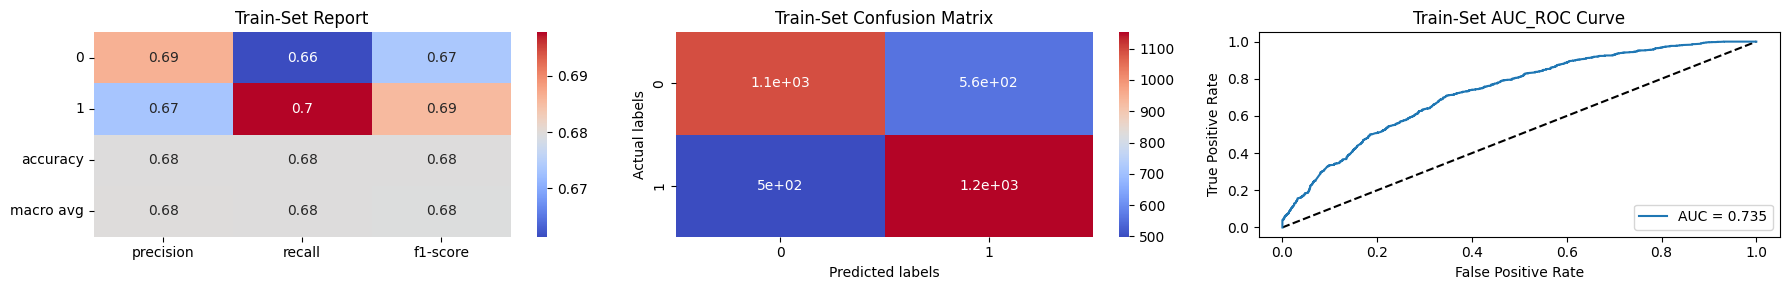

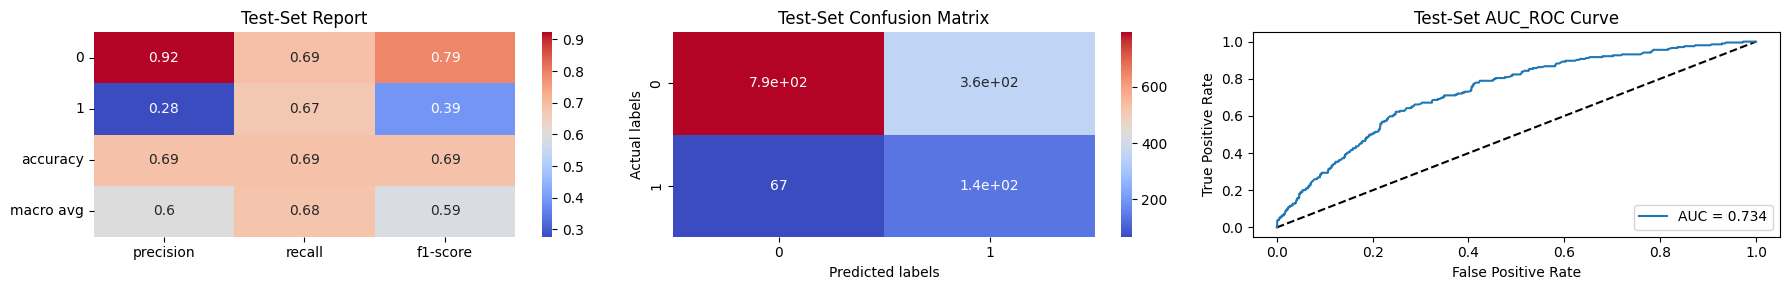

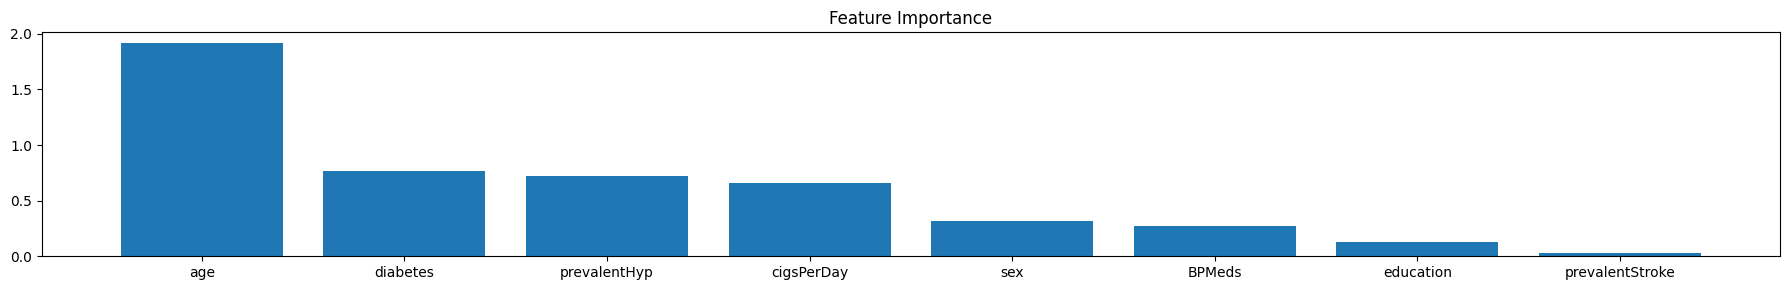

LogisticRegression(C=0.1, solver='saga')

In [58]:
# Visualization evaluation Metric Score chart

analyse_model(lr.best_estimator_,x_train, x_test, y_train, y_test)

### ML Model-2



### Support Vector Classifier

In [59]:
# SVM algorithm
clf = SVC(random_state=0,probability=True)

# Cross- Validation & Hyperparameter Tuning
grid = { 'kernel':["linear","rbf","poly","sigmoid"],
        'C': [0.1,1,10,100],
         'max_iter':[1000]}

# GridSearch to find the best parameters
svc = GridSearchCV(clf, param_grid = grid, cv=5)
svc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'max_iter': [1000]})

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

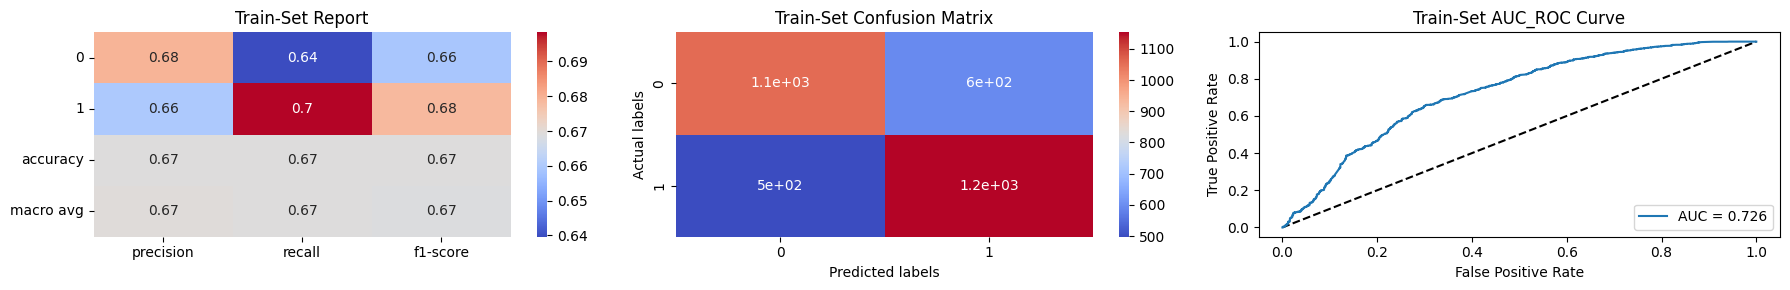

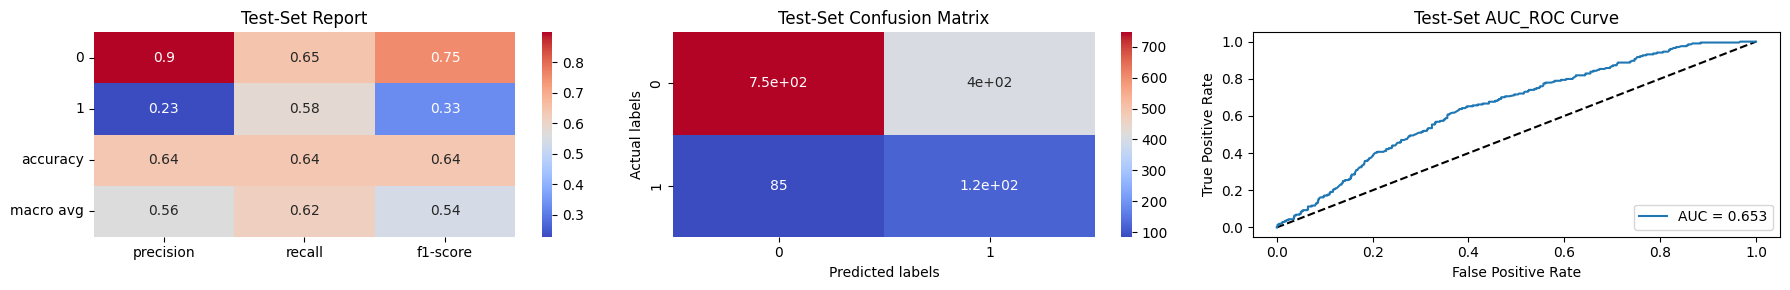

<Figure size 1800x300 with 0 Axes>

SVC(C=10, max_iter=1000, probability=True, random_state=0)

In [60]:
# Analysing the model with best set of parameters

analyse_model(svc.best_estimator_, x_train, x_test, y_train, y_test)

### ML Model-3

## Naive Bayes Classifier

In [61]:
# ML Model - 3 Implementation

# Fitting Naive Bayes Classifier
nbc = GaussianNB()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

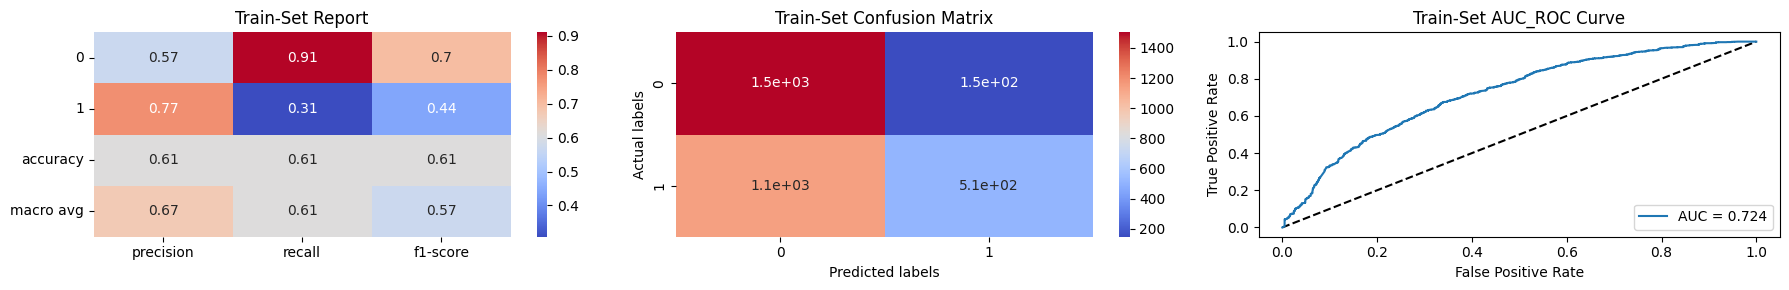

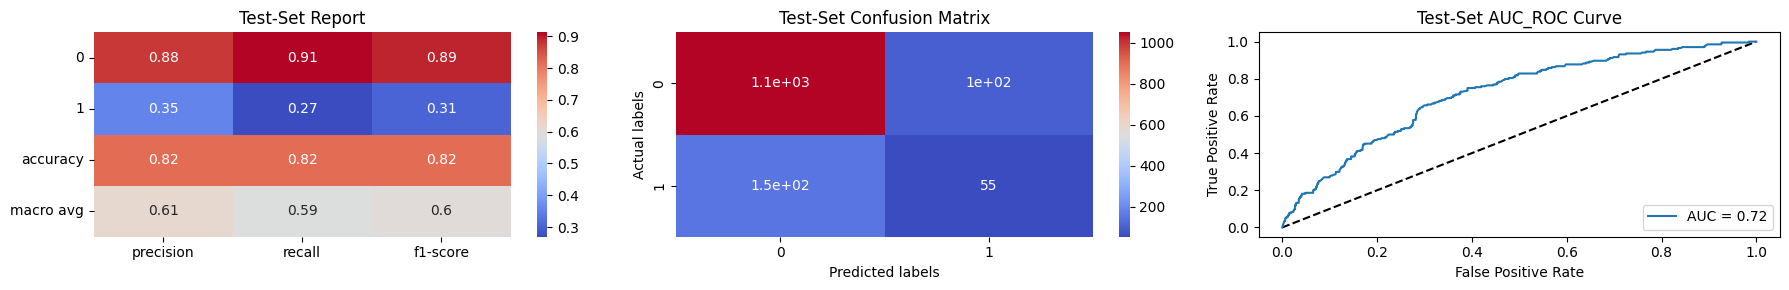

<Figure size 1800x300 with 0 Axes>

GaussianNB()

In [62]:
# Visualizaing evaluation Metric Score chart

analyse_model(nbc, x_train, x_test, y_train, y_test)

ML Model-4

## XGBoost Classifier

In [63]:
#classifier

clf = XGBRFClassifier(random_state=3)

#cross Validation & Hyperparameter Tuning

#Hyperparameter Grid
grid = {'n_estimators':[150],
        'max_depth':[8,10],
        'eta':[0.05,0.08,0.1]}

#GridSearch to find the best parameters

xgb = GridSearchCV(clf,scoring=scoring, param_grid= grid, cv=5)
xgb.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, gpu_id=None,
                                       grow_policy=None, importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max...
                                       max_delta_step=None, max_depth=None,
                                       max_leaves=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       n_estimators=100, n_jobs=None,
                                       num_parallel_tree=None,
                                       objective='binary:logistic',
                                       predictor=None, random_state=3,
                                       reg_alpha=None, ...),
             param_grid={'eta': [0.05, 0.08, 0.1], 'max_depth': [8, 10],
                         'n_estimators': [150]},
             scoring=make_scorer(f1_score, pos_label=1))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

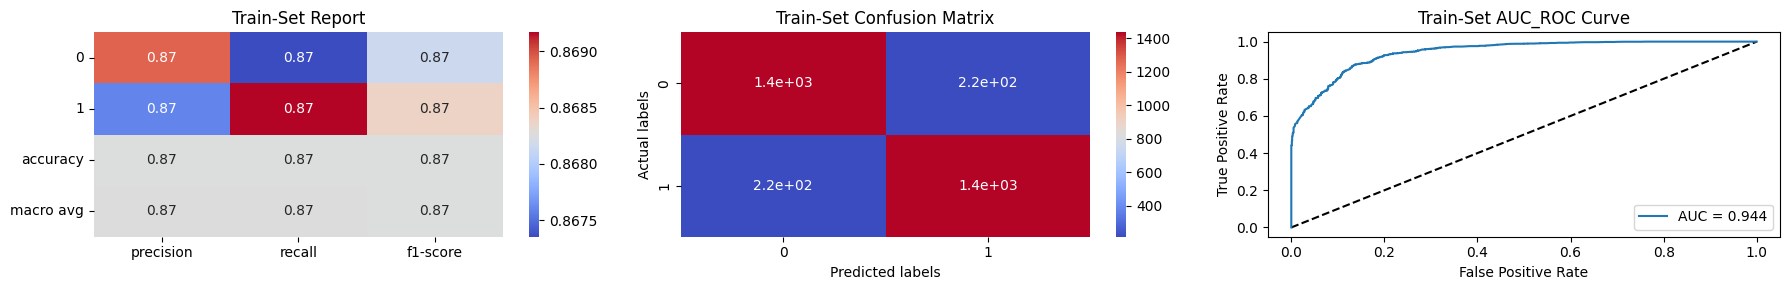

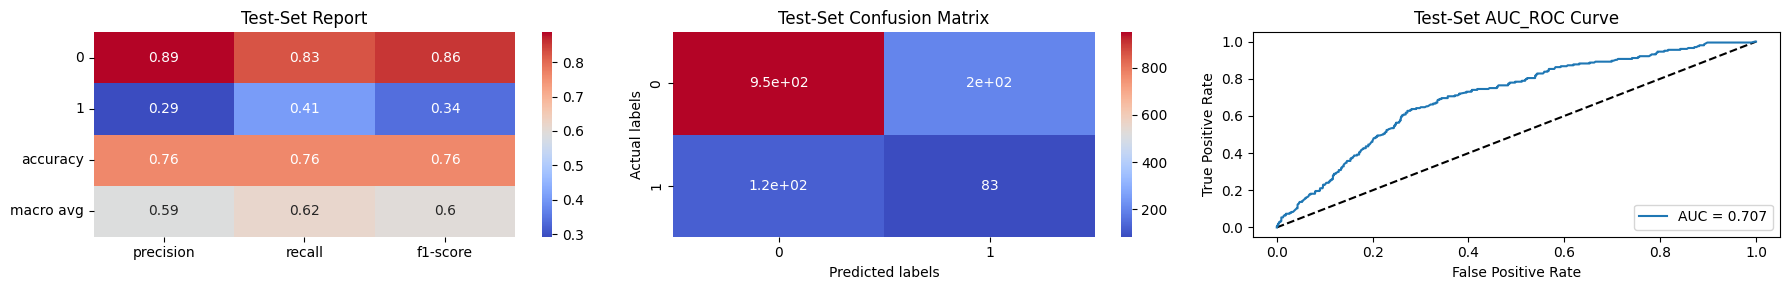

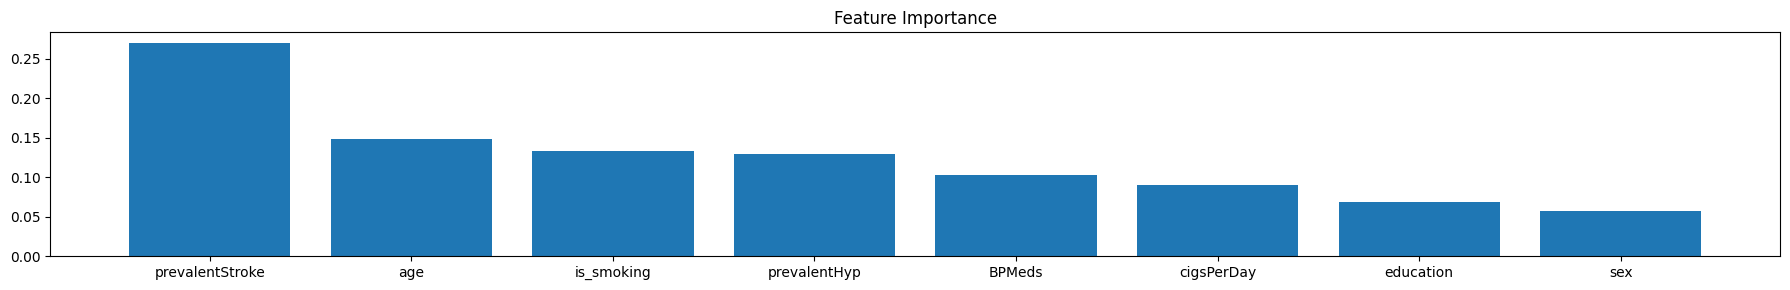

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False, eta=0.05,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=10, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=150, n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=3, ...)

In [64]:
# Analysing the model with best set of parameters

analyse_model(xgb.best_estimator_,x_train, x_test, y_train, y_test)

### ML Model-5

### Neural Network Classifier

In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Create the MLPClassifier instance
clf = MLPClassifier(random_state=0)

# Define the hyperparameter grid for GridSearchCV
grid = {
    'hidden_layer_sizes': [(50,), (100,)],  # Tuple containing hidden layer sizes
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive']
}

# Define the scoring metric (e.g., accuracy, precision, recall, etc.)
# Replace 'scoring' with the desired scoring metric or remove this line if not needed.
scoring = 'accuracy'

# Create the GridSearchCV instance
MLP = GridSearchCV(clf, param_grid=grid, scoring=scoring, cv=5)

# Perform the grid search to find the best parameters
MLP.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50,), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam']},
             scoring='accuracy')

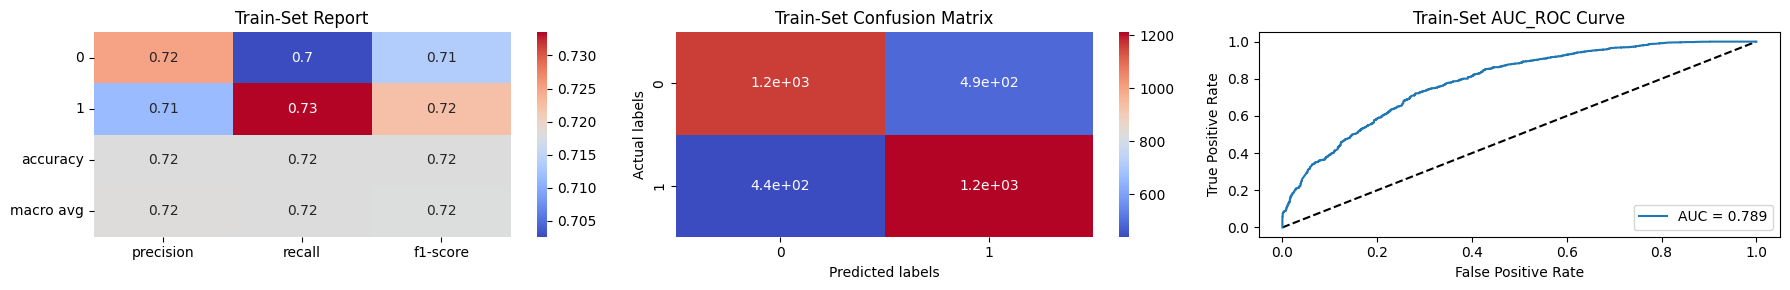

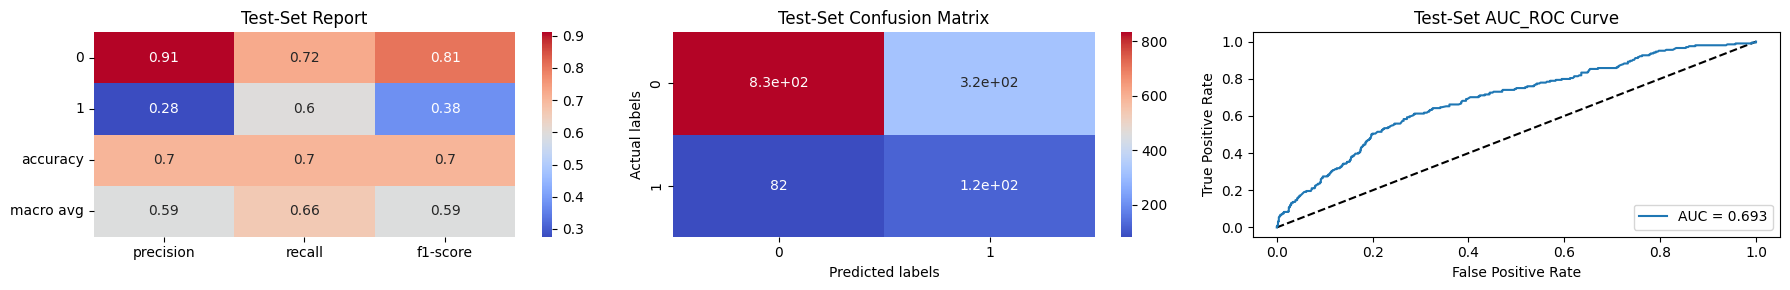

<Figure size 1800x300 with 0 Axes>

MLPClassifier(random_state=0)

In [66]:
# Analysing the model with best set of parameter.
analyse_model(MLP.best_estimator_, x_train, x_test, y_train, y_test)

In [67]:
# Defining the Dataframe of test datascores.

score_df = score_df.T

score_df['model'] = ['Logistic Regression','SVM','Gaussian NB','XGBRFclassifier','Neural Network Classifier']

score_df = score_df.set_index('model')
score_df

precision    recall  f1_score  accuracy
model                                                             
Logistic Regression         0.276768  0.671569  0.391989  0.686578
SVM                         0.227099  0.583333  0.326923  0.638643
Gaussian NB                 0.352564  0.269608  0.305556  0.815634
XGBRFclassifier             0.292254  0.406863  0.340164  0.762537
Neural Network Classifier   0.276018  0.598039  0.377709  0.703540

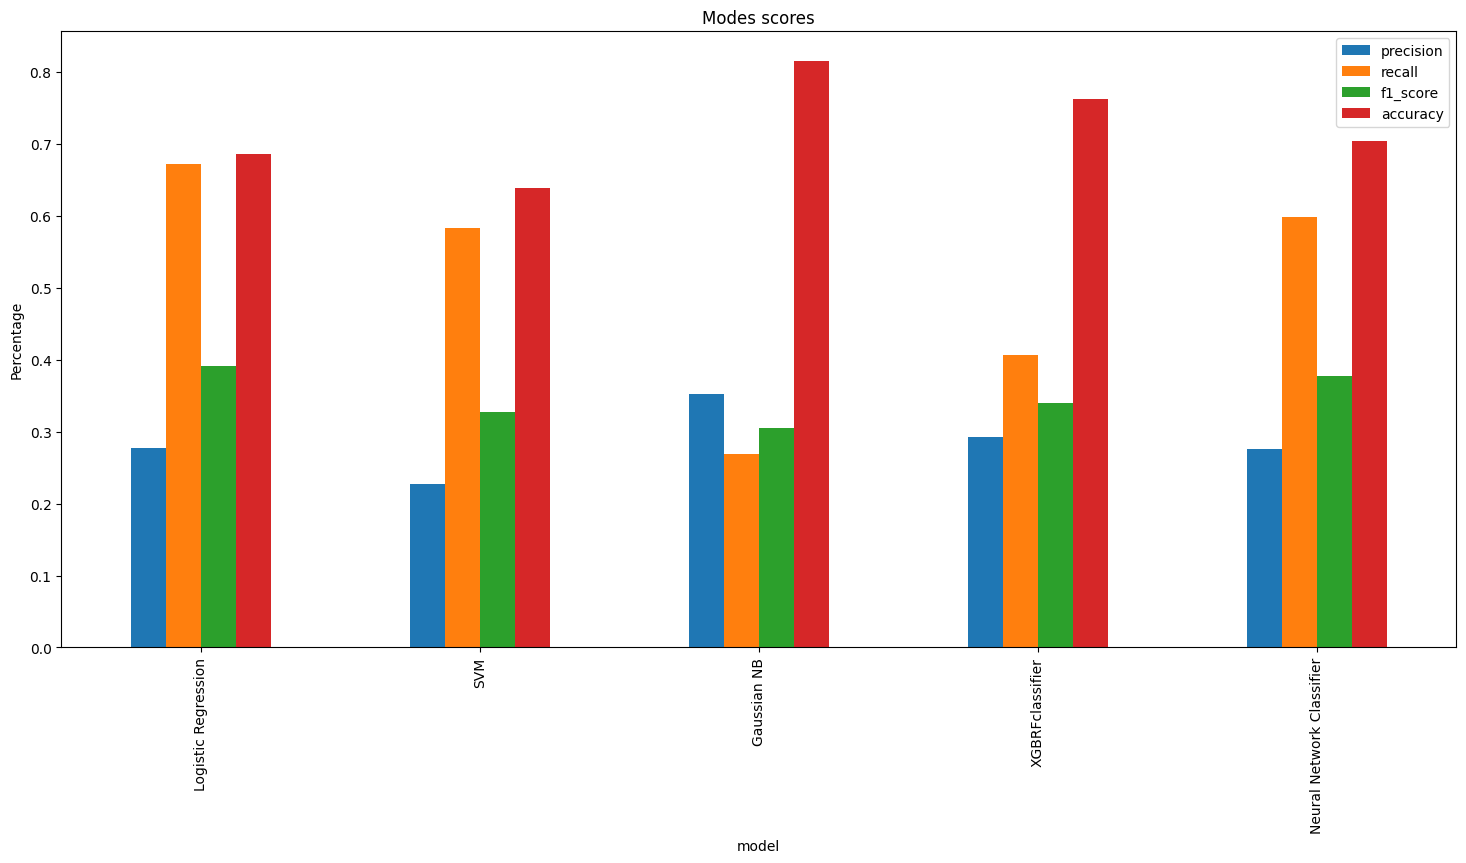

In [68]:
# visualizing the model scores using bar graph.

score_df.plot.bar(figsize = (18,8))

plt.title('Modes scores')
plt.ylabel('Percentage')
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

1)Accuracy: Accuracy measures the overall correctness of prediction and is useful when class distribution and all classes are equally important.

2)Precision: Precision represents the proportion of true positive prediction among the total positive predictions. It is valuable when the cost of false positives is high, such as in scenarios where false positives could lead to significant consequences or financial losses.

3)Recall(sensitivity): Recall measures the proportion of true positive predictionsamong the actual positive instances. It is important when the cost of false negative is high, as it focuses on minimizing the number of false negative or missed positive instances.

4)F1-score- The F1-score is the harmonic mean of precision and recall. It provides a balanced measure that conciders both precision and recall,making it useful when you want to optimize for both false positive and false negatives.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating the performance of several machine learning models on the Fremingham Heart Study dataset, I have selected the **Neural Networl(tuned)** as our final prediction model. This decision was based on the models performance on our primary evaluation metric of recall, which measures the ability of the model to correctly identify patients with CHD risk. In our analysis, we found that **Neural Network(tuned)** and **Logistic Regression** had the hightest recall score among the models we evaluted.

we chose recall as our primary evaluation metric because correctly identifying patients with CHD risk is critical to achieving our business objectives. By selecting a model with a high recall score,we aim to ensure that we correctly identify as many patients with CHD risk as possile, even if it means that we may have some false positives.Overall, we believe that the Neural Network(tined) is the best choise for our needs and will help as achieve a positive business impact.

## Conclusion

In conclusion, this project demonstrated the potentiaal of machine learning techniques to accurately predict the 10-year risk of future coronary heart disease(CHD) in patients using data from an ongoing cardiovascular study. Key points from this project include.

Careful data preprocessing and transformation improved the performance of machine learning models and enables more accurate predictions.

Feature selecting was important for identifying the most relevant predictors of CHD risk.

The Neural Netework model(tuned) was chosen as the final prediction model due to its high recall score.

Techniques such as SMOTE combined with Tomek links undersampling and standard scalar scaling were used to handle imbalanced data and improve model performance.

This project provides a valuable example of how machine learning techniques can be applied to real-world problem to achieve positive business impact.

Overall, this project highlights the importance of careful data preparation and analysis in machine learning projects By taking the time to clean and transform the,select relevant features,and choose an appropriate model, it is possible to accurate predictions and support decision making in a wide range of domains.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***